In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Dockera image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

warnings.filterwarnings('ignore')

### **1. Data Preparation and Cleaning**
1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Data exploration
4. Fix any missing or incorrect values

#### **1. Load the file using Pandas**

In [ ]:
df = pd.read_csv('./Data/US_Accidents.csv', sep=',')
# pd.set_option('display.max_columns', None)

# show top five data
df.head(3)

#### **2. Look at some information about the data & the columns**
In this session, I will try to show the initial information that can be shown from the US incident dataset

In [3]:
# In this session, I will try to present important information from the data that we can analyze
print('1. Dimensions of the data :', df.shape)

print('\n2. Information about data :\n')
print(df.info())

print('\n3. Statistical information from the data:\n')
print(df.describe())

print('\n4. Show null data on dataset : ', df.isna().sum().sum())
print(df.isna().sum())

data_cols_num = []
data_min_varians = []
data_max_varians = []

for i in df.columns:
    if df[i].dtypes == 'float64' or df[i].dtypes =='int64':
        data_cols_num += [i]
        
for k in data_cols_num:
    mean = df[k].mean()
    std = df[k].std()
    if std < mean:
        data_min_varians.append(k)
    else:
        data_max_varians.append(k)
        
print('\n5. Columns data set is not very varied: ')
print(data_min_varians)

print('\n6. Columns data set is to varied:')
print(data_max_varians)

1. Dimensions of the data : (2845342, 47)

2. Information about data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp 

Here are some important things to note before moving on to the next sesssion.
1. From the dataset, there are 2845342 rows and 47 columns
2. We need to transform the data. For example, we need to transform the Start_Time column with object data type into datetime data type to make it easier for data exploration.
3. Some columns from the dataset, I will eliminate because the data is not really needed in this case.
4. From statistical information, some important things to note. On data classified as 'Columns data is not very varied', it can be said that the average of the data can be represented or described using the 'average' data for each accident. 
        1. 'Severity'
        2. 'Start_Lat'
        3. 'End_Lat'
        4. 'Temperature(F)'
        5. 'Wind_Chill(F)'
        6. 'Humidity(%)'
        7. 'Pressure(in)'
        8. 'Visibility(mi)'
        9. 'Wind_Speed(mph)'
5. There are 3414349 null data in the US accident dataset

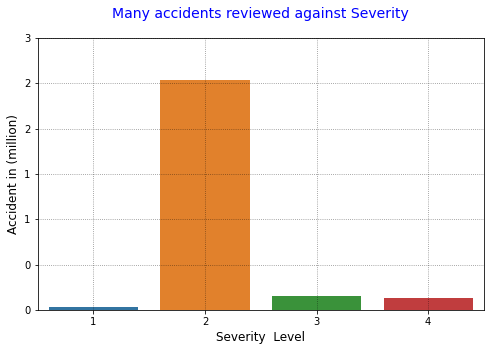

In [4]:
# plot of many accidents in terms of severity
plt.figure(figsize=(8,5))

severity = pd.cut(df['Severity'], bins=[0, 1, 2, 3, 4], labels=['1','2','3','4'])
sn.countplot(severity)
plt.title('Many accidents reviewed against Severity', fontsize=14, c='b', pad=20)
label, locations = plt.yticks()
plt.yticks(label, (label/1000000).astype('int64'))
plt.xlabel('Severity  Level', fontsize=12)
plt.ylabel('Accident in (million)', fontsize=12)
plt.grid(c='black', alpha=0.5, linestyle=':')
plt.show()

**From the graph, it can be seen that the incidence of accidents in the US mostly occurs in severity-2 conditions.**

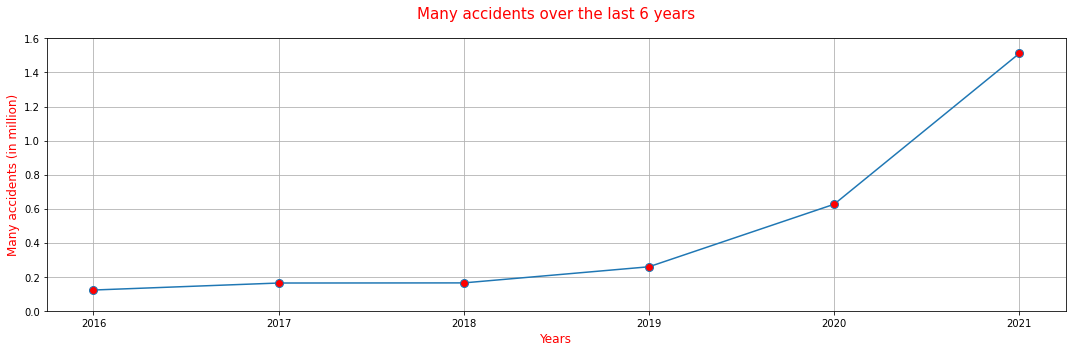

In [5]:
# # I will try to show data on the number of accidents for the last 6 years (2016 - 2021).

test = df[['ID','Start_Time']]

test['Years'] = df['Start_Time'].apply(lambda x: x.split('-')[0]).astype('int64')
test.head()
test = test.drop('Start_Time', axis=1)

label_years = ['2016','2017','2018','2019','2020','2021']
data_year = []

for i in test['Years'].value_counts().sort_values():
    data_year.append(i)

plt.figure(figsize=(15,5))
plt.plot(label_years, data_year, marker='o', markersize=8, markerfacecolor='r')
plt.title('Many accidents over the last 6 years', fontsize=15, pad = 20, c='r')
plt.xlabel('Years', fontsize=12, c='r')
plt.ylabel('Many accidents (in million)', fontsize=12, c='r')

labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype('float64'))

plt.grid()
plt.tight_layout()
plt.show()

#### **3. Data exploration**
In this session, I will try to process data through the severity level of 'Severity' from the data that has been provided

Here are some things that we will analyze regarding the level of severity at level_n are as follows.
1. City
2. Temperature(F)
3. wind chill
4. all kinds of boolean data types
5. Astronomical Twilight
6. Humidity(%)
7. Pressure(in)
8. Visibility(mi)
9. Wind Speed(mph)
10. Weather Condition

In [6]:
# I create B is a new dataframe with index is severity then create dataframe level according to severity level.
B = df.set_index('Severity').sort_values(by = 'Start_Time')

In [7]:
df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day


In [8]:
# First, I try to separate each level in dataframe B and then analyze each level.
columns = ['ID','City', 'County', 'Temperature(F)', 'Wind_Chill(F)', 'Astronomical_Twilight',
           'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition']

columns_bool = []
all_level = []

for i in range(1, 5):
    level_i = B.loc[i]
    all_level.append(level_i)
    
for i in B.columns:
    if B[i].dtypes == 'bool':
        columns_bool.append(i)
        
for i in columns_bool:
    columns.append(i)
    
for i in range(0,4):
    all_level[i] = all_level[i][columns]

##### **1. Level 1**
severity level_1 is the lowest level of severity of the data owned. 

In [9]:
# In this session, I will try to present important information from the data that we can analyze
level_1 = all_level[0]

print('1. Dimensions of the data :', level_1.shape)

print('\n2. Information about data :\n')
print(level_1.info())

print('\n3. Show null data on dataset : ', level_1.isna().sum().sum())
print(level_1.isna().sum())

level_1_cols_num = []
level_1_low = []
level_1_high = []

for i in level_1.columns:
    if level_1[i].dtypes == 'float64' or level_1[i].dtypes == 'int64':
        level_1_cols_num.append(i)
        
for i in level_1_cols_num:
    if level_1[i].std() < level_1[i].mean():
        level_1_low.append(i)
    elif level_1[i].std() > level_1[i].mean():
        level_1_high.append(i)
        
print('\n4. Columns data set is not very varied: ')
print(level_1_low)

print('\n5. Columns data set is to varied:')
print(level_1_high)

1. Dimensions of the data : (26053, 24)

2. Information about data :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26053 entries, 1 to 1
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     26053 non-null  object 
 1   City                   26050 non-null  object 
 2   County                 26053 non-null  object 
 3   Temperature(F)         25737 non-null  float64
 4   Wind_Chill(F)          25572 non-null  float64
 5   Astronomical_Twilight  26050 non-null  object 
 6   Humidity(%)            25719 non-null  float64
 7   Pressure(in)           25765 non-null  float64
 8   Visibility(mi)         25740 non-null  float64
 9   Wind_Speed(mph)        25599 non-null  float64
 10  Weather_Condition      25705 non-null  object 
 11  Amenity                26053 non-null  bool   
 12  Bump                   26053 non-null  bool   
 13  Crossing               26053 non-null  b

In [10]:
# Statistical information from the dataframe level_1
level_1.describe()

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,25737.000000,25572.000000,25719.000000,25765.000000,25740.000000,25599.000000
mean,71.257955,70.929767,49.972549,29.014460,9.530788,8.390601
std,15.950750,16.562012,28.068547,1.313317,1.996005,5.240111
min,16.000000,4.000000,2.000000,20.840000,0.000000,0.000000
25%,59.000000,59.000000,25.000000,28.620000,10.000000,5.000000
50%,72.000000,72.000000,50.000000,29.580000,10.000000,8.000000
75%,83.000000,83.000000,74.000000,29.920000,10.000000,12.000000
max,111.000000,111.000000,100.000000,30.500000,75.000000,64.000000


**Here are some important things to note before moving on to the next sesssion.**
1. From the dataset level_1, there are 26053 rows and 23 columns
2. Some columns from the dataset, I will eliminate because the data is not really needed in this case.
3. From statistical information, some important things to note. On data classified as 'Columns data is not very varied', it can be said that the average of the data can be represented or described using the 'average' data for each accident. 
      1. Temperature(F) : 71.257955 F ~ 21.809975 C
      2. Wind Chill(F)  : 70.929767 ~ 21.6276483333 C
      3. Humidity(%)    : 49.972549 %
      4. Pressure(in)   : 29.014460 in
      5. Visibility(mi) : 9.530788 mi
      6. Wind Speed(mph) : 8.390601 mph
4. There are 2540 blank data in the US accident dataset

In [11]:
# I'm trying to create a percentile function. Indeed we can use np.percentil but I have tried and failed.

def percentile(data):
    value = []
    value_i = 0
    for i in range(0,11):
        value_i = data.quantile(i/10)
        value.append(value_i)
    return value

In [12]:
# Next it will look for the percentile value of each column of data with a numeric value of dataframe dataframe level_1.

A = []

for i in level_1_cols_num:
    A += [percentile(level_1[i])]
    

    
percentil_data = {
    'Temperature(F)' : A[0],
    'Wind_Chill(F)':A[1],
    'Humidity(%)':A[2],
    'Pressure(in)':A[3],
    'Visibility(mi)':A[4],
    'Wind_Speed(mph)':A[5]}

percentil_data = pd.DataFrame(percentil_data)

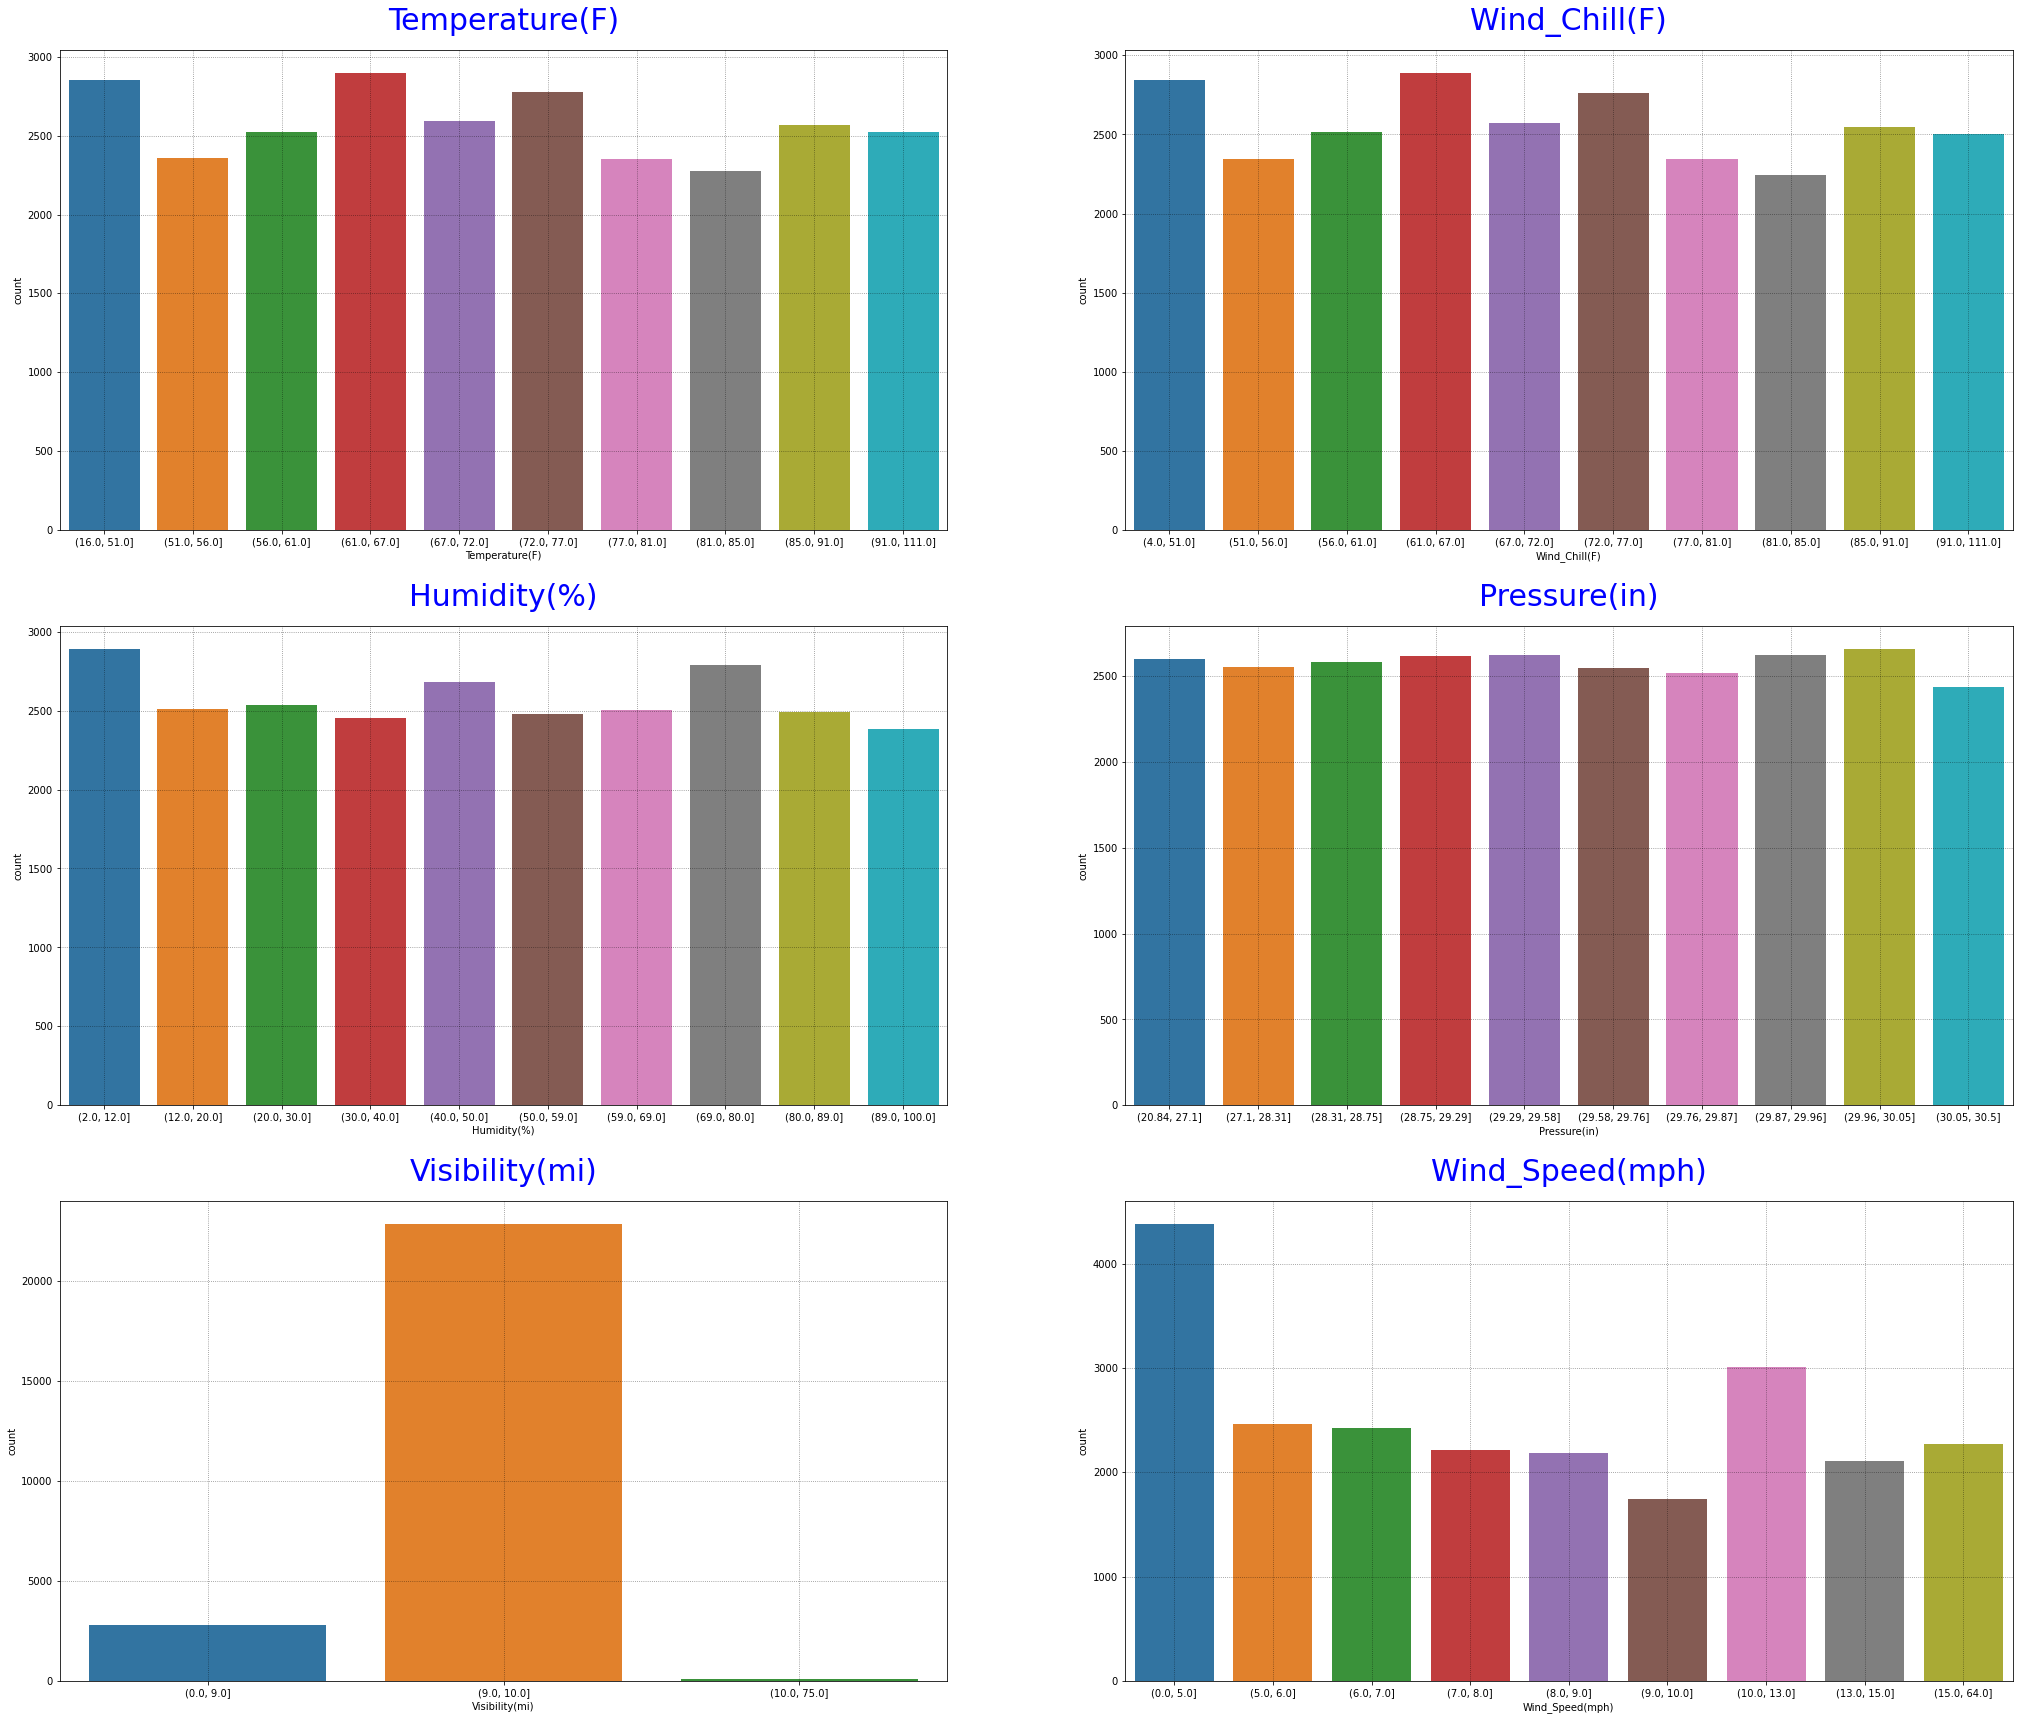

In [13]:
# I tried to display it using a plot bar to make it easy to see the difference in the number of accidents.

n_rows, n_cols = 3, 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(35, 30))

all_bins = []
n_bins = []    

for i in range(0, 6):
    n_bins = pd.cut(level_1[level_1_cols_num[i]], percentil_data[level_1_cols_num[i]].drop_duplicates().values)
    all_bins.append(n_bins)
    
for i in percentil_data.columns:
    n_bins = pd.cut(level_1[i], percentil_data[i].drop_duplicates().values)
    all_bins.append(n_bins)
  

I = -1
for r in range(0, n_rows):
    for c in range(0, n_cols):
        I += 1
        ax = axs[r][c]
        sn.countplot(all_bins[I], ax=ax)
        ax.grid(c='black', alpha=0.5, linestyle=':')
        ax.set_title(level_1_cols_num[I], fontsize=30, pad=20, c='b')


plt.show()

1. First, let's look at the graph 'Temperature(F)', the most accidents occur on the red bar that is at the temperature 61 F - 67 F. If we look at the graph 'Wind_Chill(F)', it has similarities in the table 'Temperature ( F)' with a total number of accidents of 2899. provides the information we need to examine the correlation between variables later.

2. In the graph 'Humidity(%)' most accidents occur on the blue bar with 'Humidity(%)' of 2% - 12% with the number of accidents of 2893 accidents.

3. If we look at the 'Pressure(in)' graph, the bars do not have a very large accident difference and it can be concluded that the effect of 'Pressure(in)' starting from the smallest pressure value of 20 in - 30 in is not so influential on many accident case.

4. There are interesting things we can see in the graph 'Visibility(mi)'. In our basic logic, most accidents must occur at our visibility that is too short. However, data US Accident in Level_1 data doesn't speak like that, the most accident cases are at a visibility of 9 mi - 10 mi with a lot of accident cases of 22831 accidents and then the second highest with a shorter visibility that is 0 mi - 9 mi with many cases 2786 accidents then the smallest accident case was with a fairly far (good) visibility of 10 mi - 75 mi with the number of accident cases amounting to 109.

    I assume that the number of accidents on the blue bar with 'Visibility(mi)' 0 mi - 9 mi is smaller than the orange bar with 'Visibility(mi)' 9 mi - 10 mi because the driver is more careful when driving due to the low visibility. quite short.
   
5. and lastly, we can see from the 'Wind_Speed(mph)' graph, the most accidents occur at wind speeds of 0 mph - 5 mph with the most accidents being 4381 accidents. Then the second most accident cases occurred at wind speeds of 10 mph - 13 mph with the number of accidents being 1012 accidents

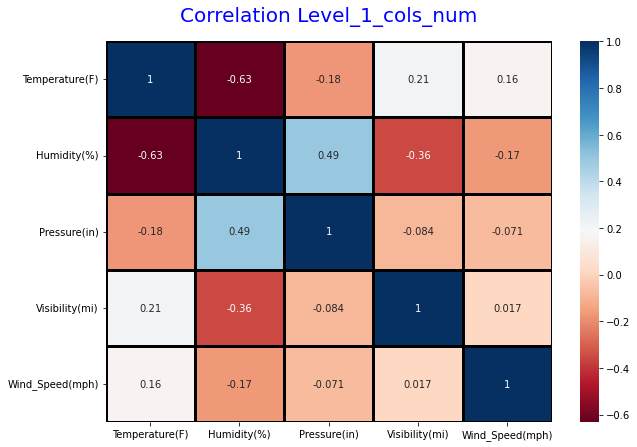

In [85]:
# and now, let's look at the correlation between numeric data type variables at Level_1

corelation = level_1[level_1_cols_num]

plt.figure(figsize=(10, 7))
plt.title('Correlation Level_1_cols_num', fontsize=20, pad=20, c='b')
sn.heatmap(corelation.corr(), cmap='RdBu', linecolor='black', linewidth=3, annot=True)
plt.show()

**from the correlation graph you can see that dark blue means highly correlated and white has less correlation. The correlation here shows that for every increase in data on variable n, the variable m will also increase if it has a good correlation.**

**It can be seen that the lowest correlation between variables is -0.6 and the highest correlation between variables is 1. So I will try to classify the variables including highly correlated, uncorrelated and highly uncorrelated.**

In [15]:
jj = corelation.reset_index().drop('Severity', axis=1)

In [16]:
HC = []  # a collection of variables with a high correlation, namely the correlation value [0.6, 1)
Uc= []   # a collection of variables with less correlation, with a correlation value [-0.2, 0.6)
HUc = [] # a collection of variables with no correlation with each other, with correlation values [-0.6, -0.2)

for i in range(0, len(jj.columns)):
    for k in range(1, len(jj.columns)):
        cor_n = jj[[level_1_cols_num[i], level_1_cols_num[k]]].corr().values[0][1]
        if cor_n > -0.6 and cor_n < -0.2:
            cor_n = jj[[level_1_cols_num[i], level_1_cols_num[k]]].columns
            HUc.append(cor_n)
        elif cor_n > -0.2 and cor_n < 0.6:
            cor_n = jj[[level_1_cols_num[i], level_1_cols_num[k]]].columns
            Uc.append(cor_n)
        elif cor_n > 0.6:
            cor_n = jj[[level_1_cols_num[i], level_1_cols_num[k]]].columns
            HC.append(cor_n)

In [17]:
# Here are the variables with a fairly good correlation, less correlated and no correlation at all.

print('1. Variables with good correlation :')
for i in range(0, len(HC)):
    no = i + 1
    if HC[i][0] != HC[i][1]:
        print('   * ' + '%s, %s'%(HC[i][0], HC[i][1]))
    
print('\n2. Variables with less correlation :')
for i in range(0, len(Uc)):
    no = i + 1
    if Uc[i][0] != Uc[i][1]:
        print('   * ' + '%s, %s'%(Uc[i][0], Uc[i][1]))
        
print('\n3. Variables with no correlation with each other :')
for i in range(0, len(HUc)):
    no = i + 1
    if HUc[i][0] != HUc[i][1]:
        print('   * ' + '%s, %s'%(HUc[i][0], HUc[i][1]))

1. Variables with good correlation :
   * Temperature(F), Wind_Chill(F)

2. Variables with less correlation :
   * Temperature(F), Pressure(in)
   * Temperature(F), Visibility(mi)
   * Temperature(F), Wind_Speed(mph)
   * Wind_Chill(F), Pressure(in)
   * Wind_Chill(F), Visibility(mi)
   * Wind_Chill(F), Wind_Speed(mph)
   * Humidity(%), Pressure(in)
   * Humidity(%), Wind_Speed(mph)
   * Pressure(in), Wind_Chill(F)
   * Pressure(in), Humidity(%)
   * Pressure(in), Visibility(mi)
   * Pressure(in), Wind_Speed(mph)
   * Visibility(mi), Wind_Chill(F)
   * Visibility(mi), Pressure(in)
   * Visibility(mi), Wind_Speed(mph)
   * Wind_Speed(mph), Wind_Chill(F)
   * Wind_Speed(mph), Humidity(%)
   * Wind_Speed(mph), Pressure(in)
   * Wind_Speed(mph), Visibility(mi)

3. Variables with no correlation with each other :
   * Humidity(%), Visibility(mi)
   * Visibility(mi), Humidity(%)


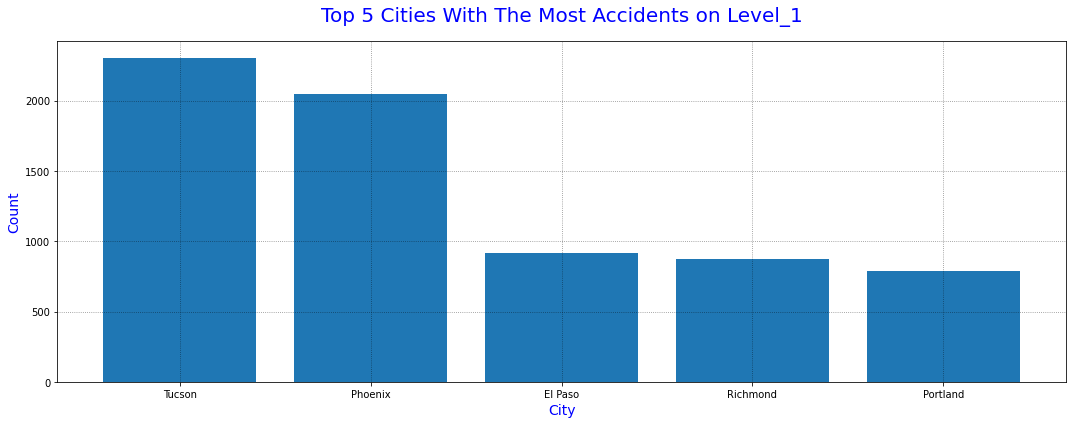

In [18]:
# Next I will show you the 5 cities with the most accidents on Level_1.

top_5 = level_1['City'].value_counts().head(5).values
top_5_city = ['Tucson', 'Phoenix', 'El Paso', 'Richmond', 'Portland']

plt.figure(figsize=(15, 6))
plt.title('Top 5 Cities With The Most Accidents on Level_1', pad=20, c='b', fontsize=20)
plt.bar(top_5_city, top_5)
plt.xlabel('City', fontsize=14, c='b')
plt.ylabel('Count', fontsize=14, c='b')
plt.grid(c='black', alpha=0.5, linestyle=':')
plt.tight_layout()
plt.show()

In [19]:
# I will try to show the accident rate in the top 5 cities on Level_1 seen by the 'Visibility(mi)' factor.

cit = level_1[['City', 'Visibility(mi)']].reset_index().drop('Severity', axis=1)
top_5_cities = []

for i in top_5_city:
    Cities = cit[cit['City'] == i]['Visibility(mi)'].dropna().values
    top_5_cities.append(Cities)

In [20]:
for i in range(len(top_5_cities)):
    No = i + 1
    hum_ave = sum(top_5_cities[i])/len(top_5_cities[i])
    print('%s. %s'%(No, top_5_city[i]) + ' accident rate on Visibility(mi) :', hum_ave)

1. Tucson accident rate on Visibility(mi) : 9.92891408634976
2. Phoenix accident rate on Visibility(mi) : 9.954523227383863
3. El Paso accident rate on Visibility(mi) : 9.875952121871599
4. Richmond accident rate on Visibility(mi) : 9.10057142857143
5. Portland accident rate on Visibility(mi) : 9.81656050955414


**accidents in the 5 highest cities in Level_1 have an accident rate with Visibility(mi) 9.1 mi - 9.5 mi.**

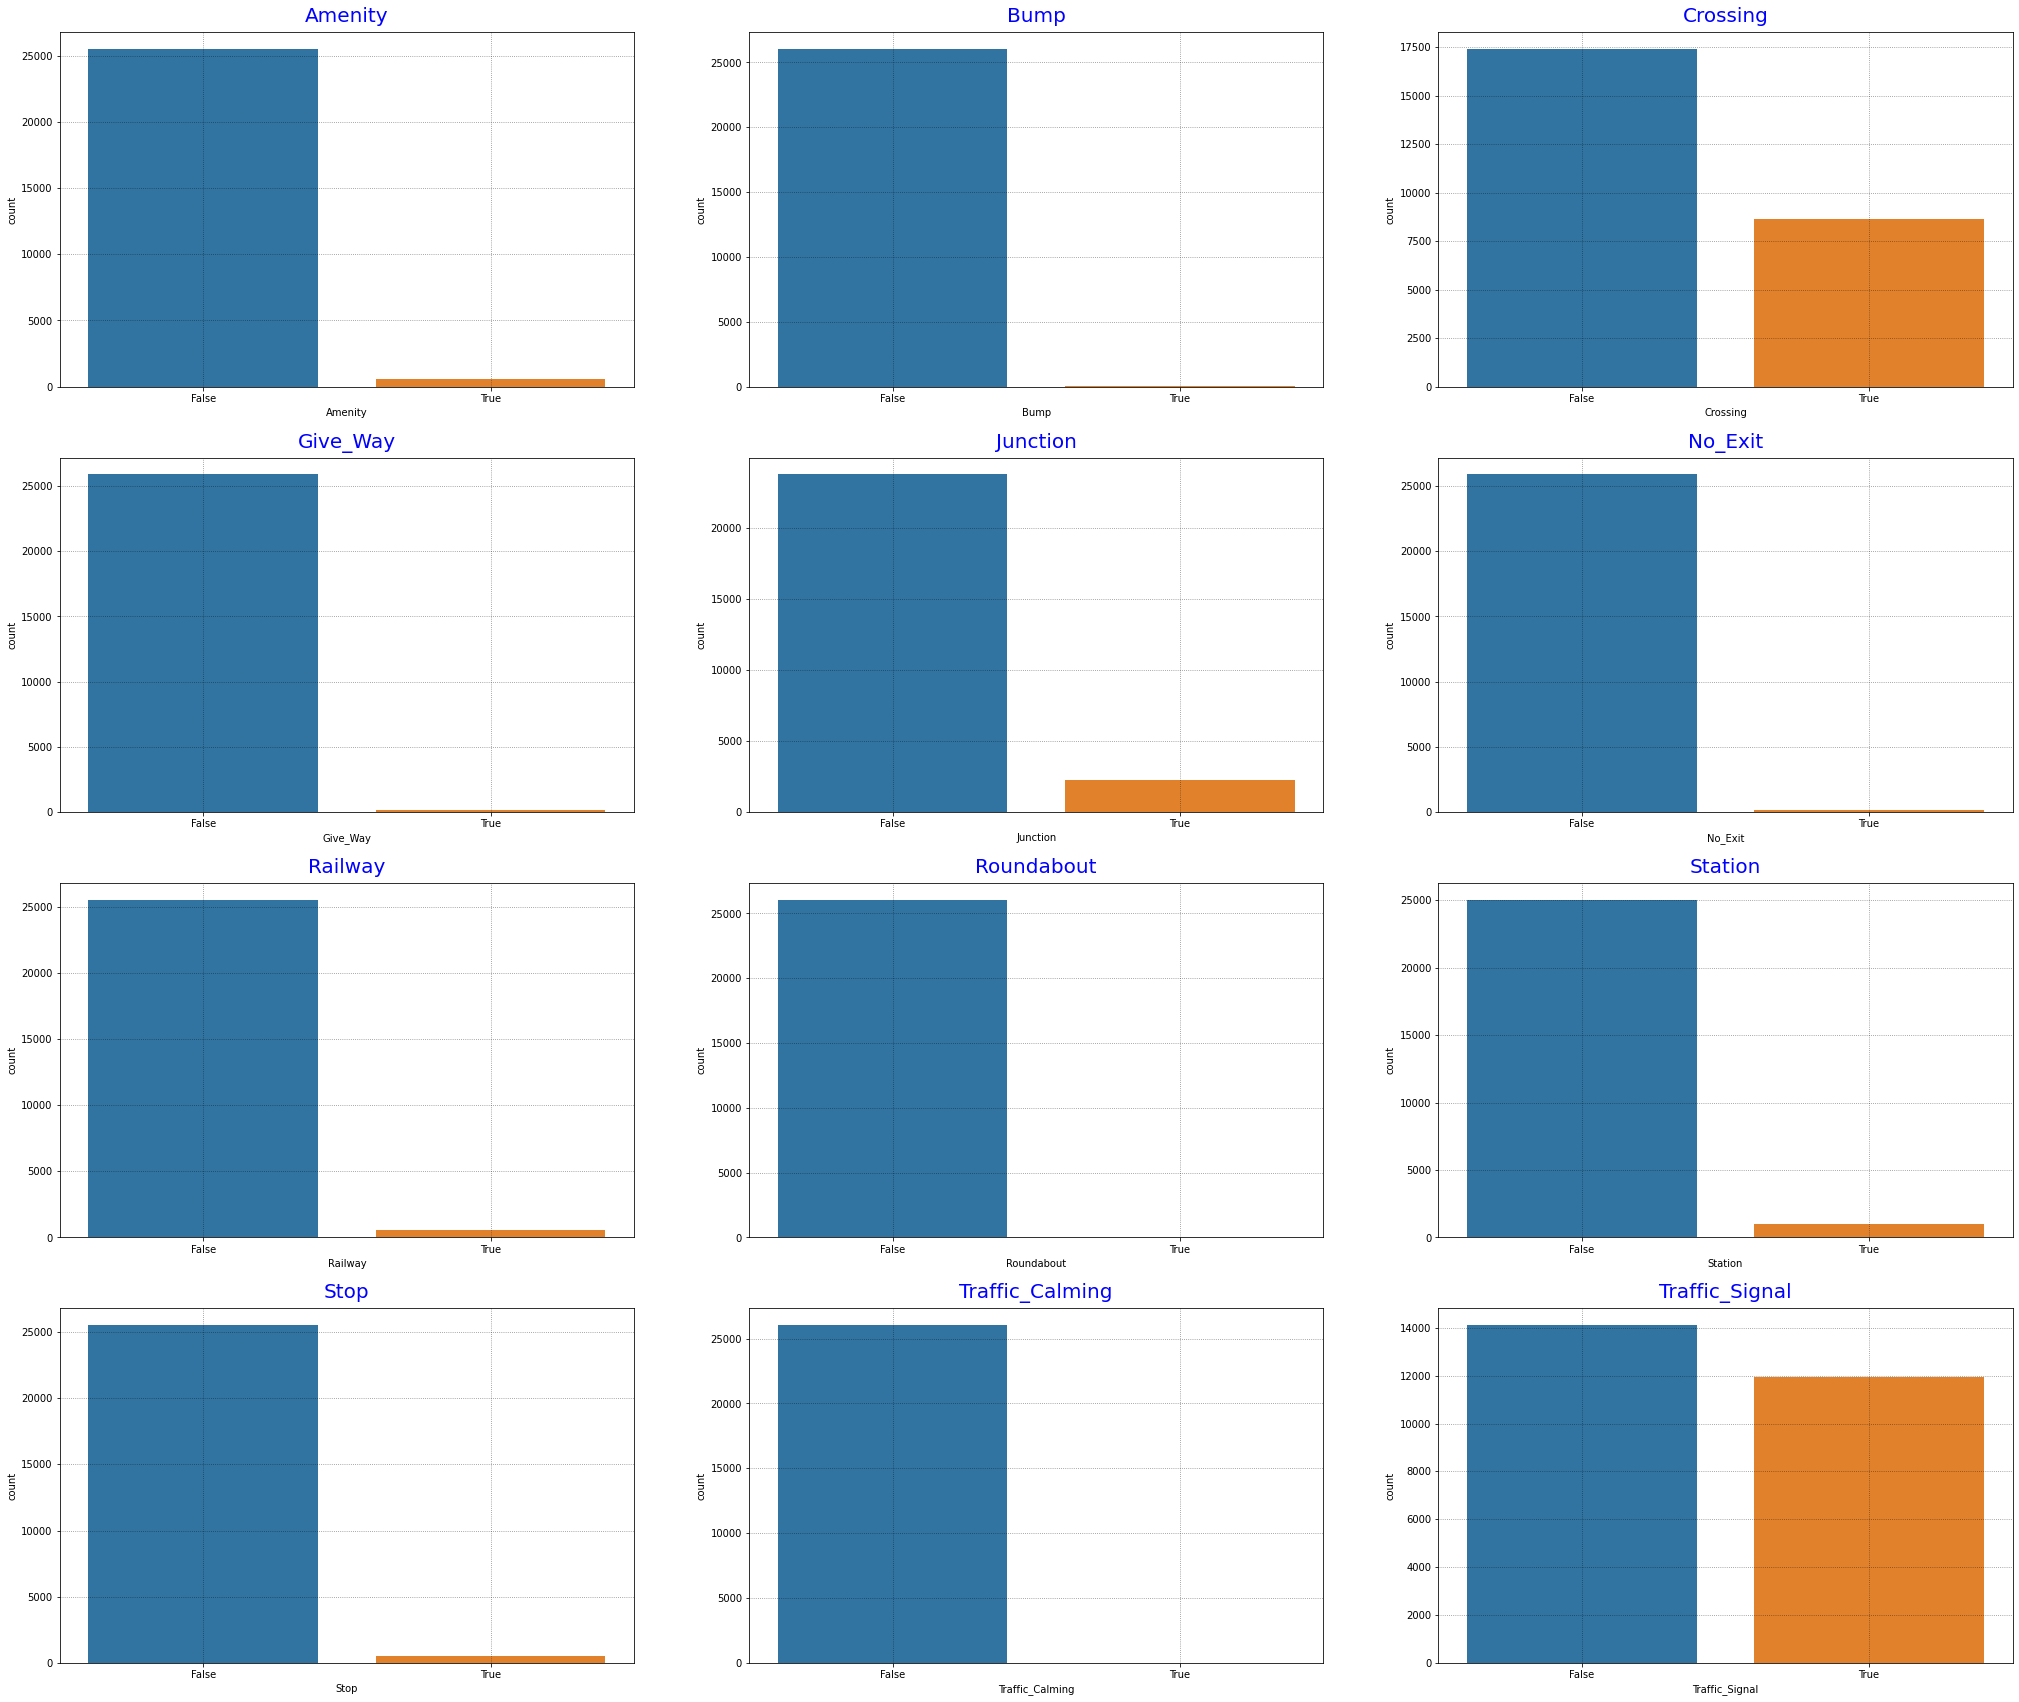

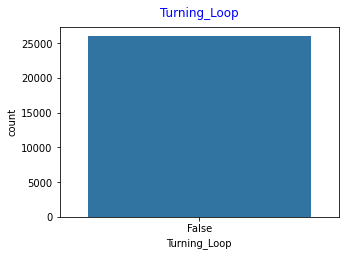

In [21]:
# Okay, for the next step on Level_1, I want to try to show the effect of signs on traffic on the many accidents that occur.

level_1_cols_bool = []

for i in level_1.columns:
    if level_1[i].dtypes == 'bool':
        level_1_cols_bool.append(i)

n_rows_b, n_cols_b = 4, 3
fig, axs = plt.subplots(n_rows_b, n_cols_b, figsize=(35, 30))     

I_n = -1
for r in range(0, n_rows_b):
    for c in range(0, n_cols_b):
        I_n += 1
        ax = axs[r][c]
        sn.countplot(level_1[level_1_cols_bool[I_n]], ax=ax)
        ax.grid(c='black', alpha=0.5, linestyle=':')
        ax.set_title(level_1_cols_bool[I_n], fontsize=20, pad=10, c='b')

plt.show()

plt.figure(figsize=(5, 3.5))
sn.countplot(level_1[level_1_cols_bool[-1]])
plt.title(level_1_cols_bool[-1], pad=10, c='b')
plt.show()

##### **2. Level 2**
level_2 level is the severity level more severe than level_1 data held.

In [22]:
# In this session, I will try to present important information from the data that we can analyze
level_2 = all_level[1]

print('1. Dimensions of the data :', level_2.shape)

print('\n2. Information about data :\n')
print(level_2.info())

print('\n3. Show null data on dataset : ', level_2.isna().sum().sum())
print(level_2.isna().sum())

level_2_cols_num = []
level_2_low = []
level_2_high = []

for i in level_2.columns:
    if level_2[i].dtypes == 'float64' or level_2[i].dtypes == 'int64':
        level_2_cols_num.append(i)
        
for i in level_2_cols_num:
    if level_2[i].std() < level_2[i].mean():
        level_2_low.append(i)
    elif level_2[i].std() > level_2[i].mean():
        level_2_high.append(i)
        
print('\n4. Columns data set is not very varied: ')
print(level_2_low)

print('\n5. Columns data set is to varied:')
print(level_1_high)

1. Dimensions of the data : (2532991, 24)

2. Information about data :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2532991 entries, 2 to 2
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   City                   object 
 2   County                 object 
 3   Temperature(F)         float64
 4   Wind_Chill(F)          float64
 5   Astronomical_Twilight  object 
 6   Humidity(%)            float64
 7   Pressure(in)           float64
 8   Visibility(mi)         float64
 9   Wind_Speed(mph)        float64
 10  Weather_Condition      object 
 11  Amenity                bool   
 12  Bump                   bool   
 13  Crossing               bool   
 14  Give_Way               bool   
 15  Junction               bool   
 16  No_Exit                bool   
 17  Railway                bool   
 18  Roundabout             bool   
 19  Station                bool   
 20  Stop                   b

In [23]:
# Statistical information from the dataframe level_1
level_2.describe()

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,2.470921e+06,2.190631e+06,2.467553e+06,2.480111e+06,2.471000e+06,2.410262e+06
mean,6.186863e+01,6.001451e+01,6.436475e+01,2.946391e+01,9.079442e+00,7.264596e+00
std,1.852588e+01,2.086113e+01,2.279935e+01,1.025340e+00,2.616517e+00,5.528793e+00
min,-8.900000e+01,-8.900000e+01,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00
25%,5.000000e+01,4.700000e+01,4.800000e+01,2.930000e+01,1.000000e+01,3.000000e+00
50%,6.400000e+01,6.300000e+01,6.700000e+01,2.981000e+01,1.000000e+01,7.000000e+00
75%,7.600000e+01,7.600000e+01,8.300000e+01,3.000000e+01,1.000000e+01,1.000000e+01
max,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03


**Here are some important things to note before moving on to the next sesssion.**
1. From the dataset level_1, there are 2532991 rows and 24 columns
2. Some columns from the dataset, I will eliminate because the data is not really needed in this case.
3. From statistical information, some important things to note. On data classified as 'Columns data is not very varied', it can be said that the average of the data can be represented or described using the 'average' data for each accident. 
      1. Temperature(F) : 61.86863 F
      2. Wind Chill(F)  : 60.01451 F
      3. Humidity(%)    : 64.36475 %
      4. Pressure(in)   : 29.46391 in
      5. Visibility(mi) : 9.079442 mi
      6. Wind Speed(mph) : 7.264596 mph
4. There are 771874 blank data in the US accident dataset

In [24]:
# Next it will look for the percentile value of each column of data with a numeric value of dataframe dataframe level_1.

A_2 = []

for i in level_2_cols_num:
    A_2 += [percentile(level_2[i])]
    
percentil_data_2 = {
    'Temperature(F)' : A_2[0],
    'Wind_Chill(F)':A_2[1],
    'Humidity(%)':A_2[2],
    'Pressure(in)':A_2[3],
    'Visibility(mi)':A_2[4],
    'Wind_Speed(mph)':A_2[5]}

percentil_data_2 = pd.DataFrame(percentil_data_2)

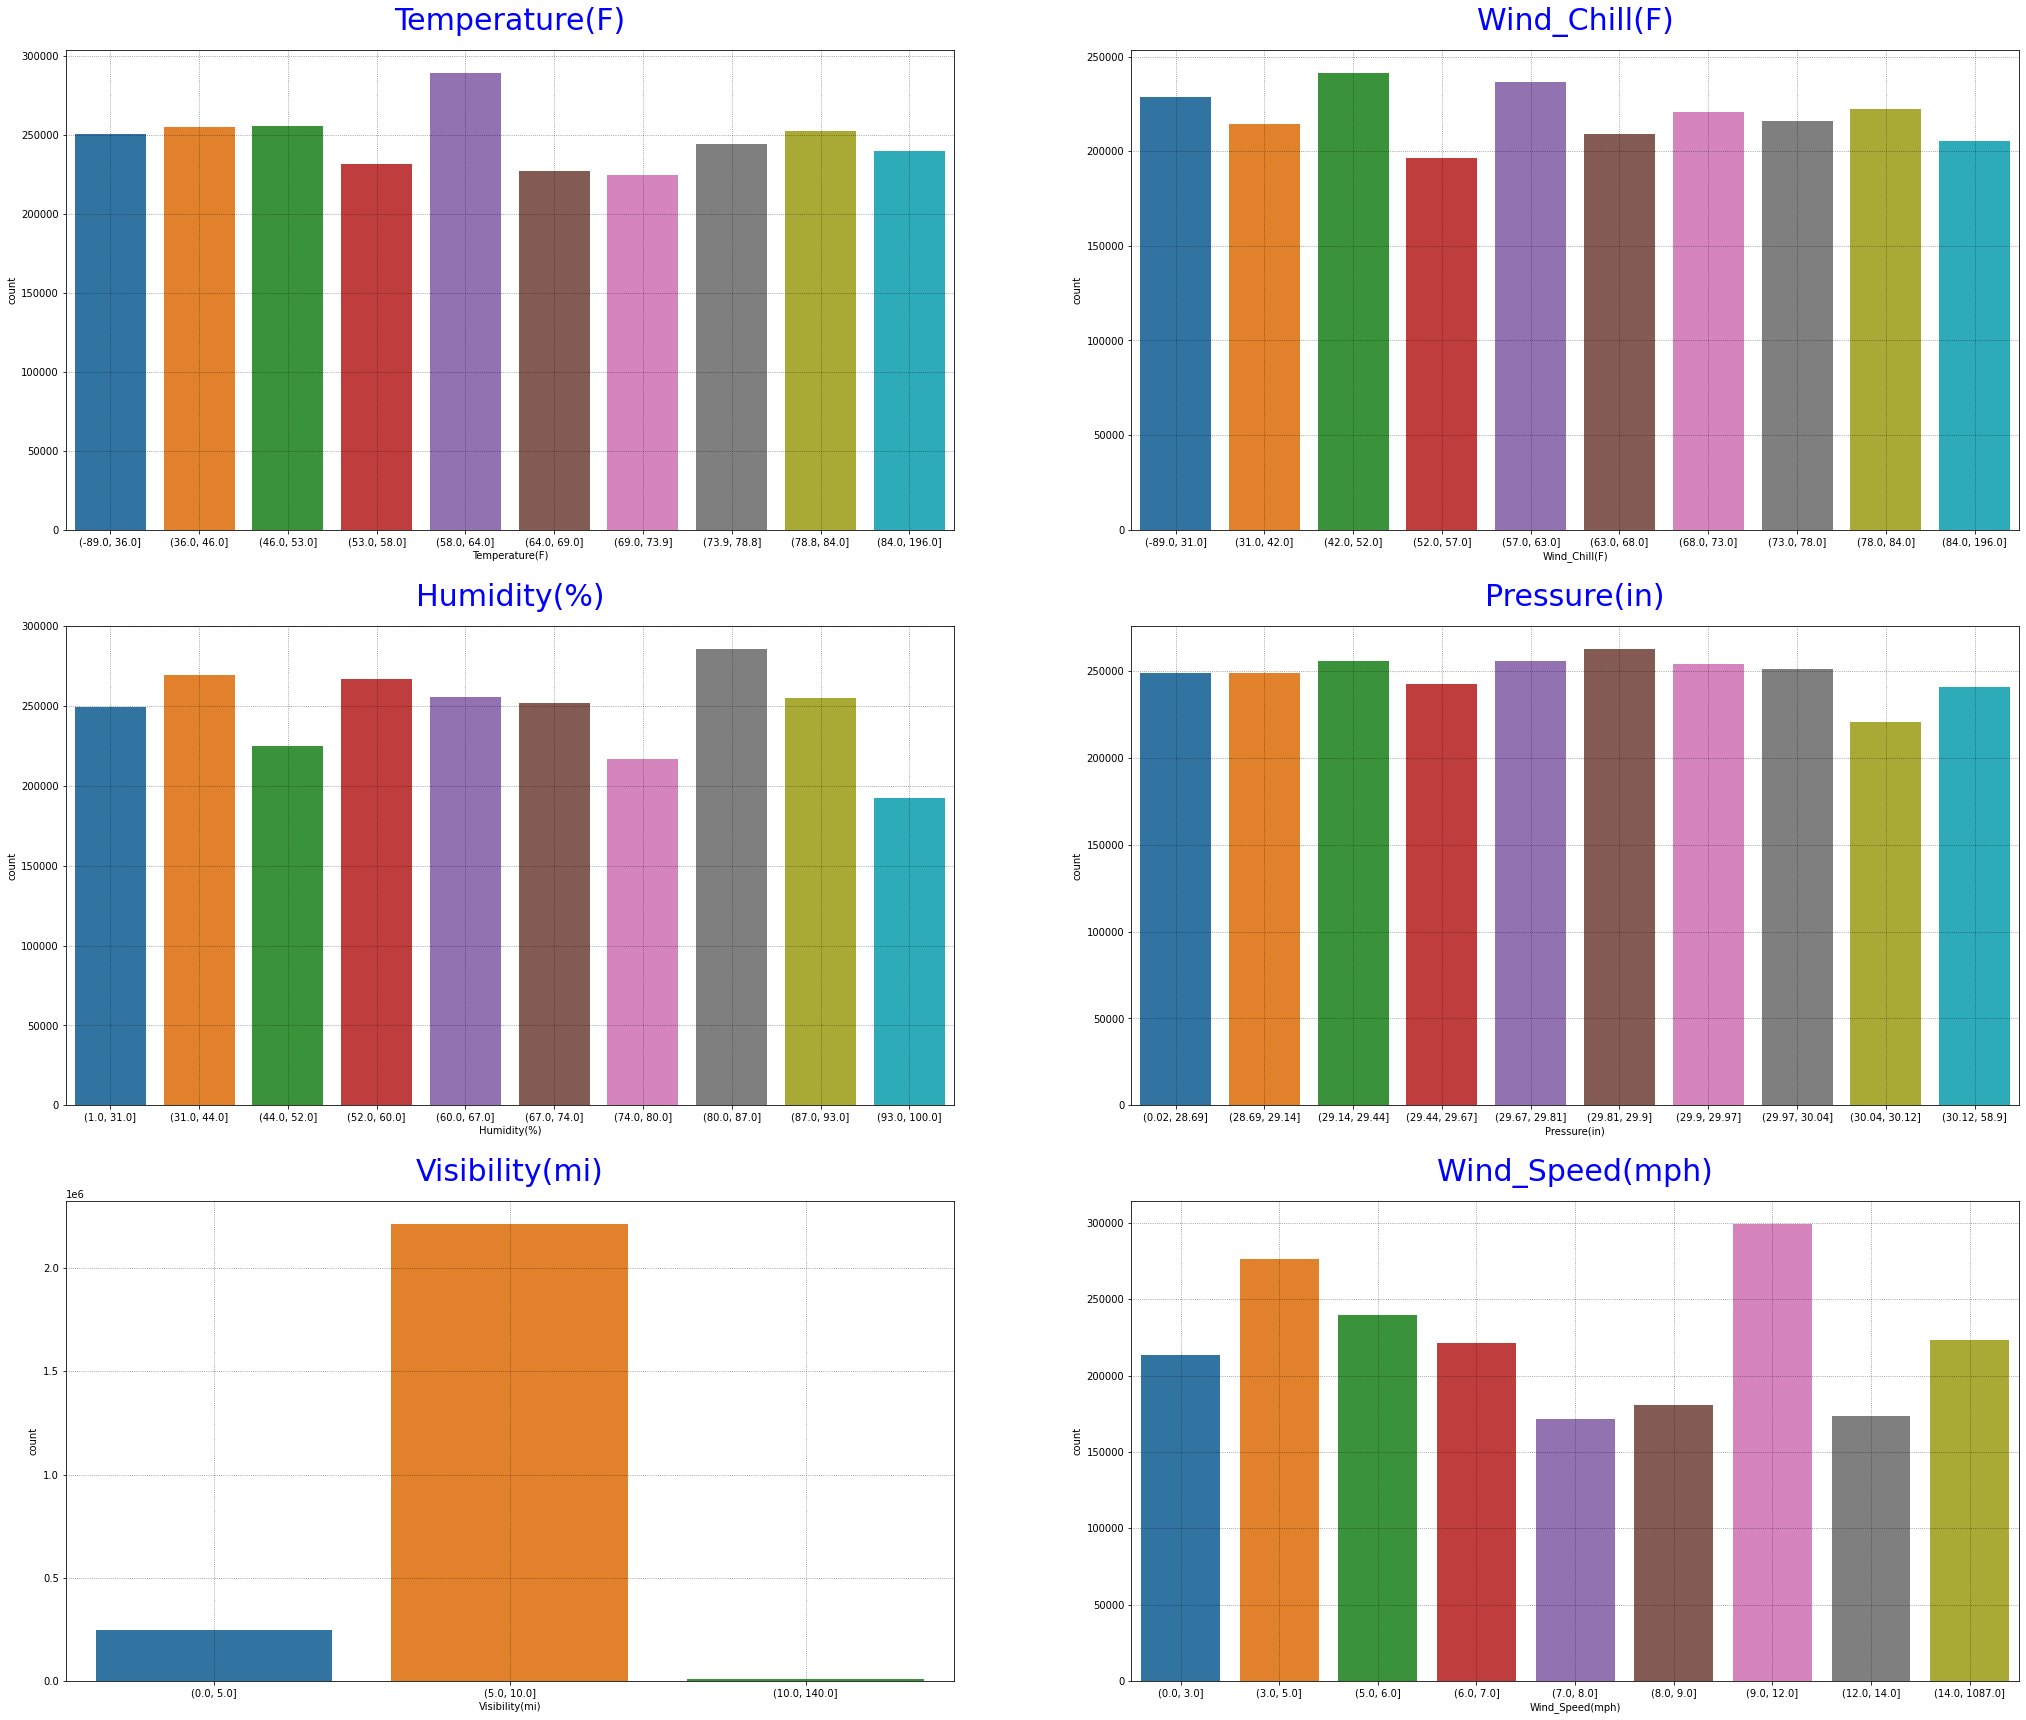

In [25]:
# I tried to display it using a plot bar to make it easy to see the difference in the number of accidents.

n_rows, n_cols = 3, 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(35, 30))

all_bins_2 = []
n_bins_2 = []    

for i in range(0, 6):
    n_bins_2 = pd.cut(level_2[level_2_cols_num[i]], percentil_data_2[level_2_cols_num[i]].drop_duplicates().values)
    all_bins_2.append(n_bins_2)
    
for i in percentil_data_2.columns:
    n_bins_2 = pd.cut(level_2[i], percentil_data_2[i].drop_duplicates().values)
    all_bins_2.append(n_bins_2)  

I_2 = -1
for r in range(0, n_rows):
    for c in range(0, n_cols):
        I_2 += 1
        ax = axs[r][c]
        sn.countplot(all_bins_2[I_2], ax=ax)
        ax.grid(c='black', alpha=0.5, linestyle=':')
        ax.set_title(level_2_cols_num[I_2], fontsize=30, pad=20, c='b')

plt.show()

1. First, let's look at the graph 'Temperature(F)', the most accidents occur on the red bar that is at the temperature 16 F - 51 F.

2. In the graph 'Humidity(%)' most accidents occur on the blue bar with 'Humidity(%)' of 69% - 80% with the number of accidents of 2532991 accidents.

3. If we look at the 'Pressure(in)' graph, the bars do not have a very large accident difference and it can be concluded that the effect of 'Pressure(in)' starting from the smallest pressure value of 30.5 in is not so influential on many accident case.

4. There are interesting things we can see in the graph 'Visibility(mi)'. In our basic logic, most accidents must occur at our visibility that is too short. However, data US Accident in Level_2 data doesn't speak like that, the most accident cases are at a visibility of 5 mi - 10 mi with a lot of accident cases of 2213912 accidents and then the second highest with a shorter visibility that is 0 mi - 5 mi with many cases 246250 accidents then the smallest accident case was with a fairly far (good) visibility of 10 mi - 75 mi with the number of accident cases amounting to 109.

    I assume that the number of accidents on the blue bar with 'Visibility(mi)' 0 mi - 5 mi is smaller than the orange bar with 'Visibility(mi)' 5 mi - 10 mi because the driver is more careful when driving due to the low visibility. quite short.
   
5. and lastly, we can see from the 'Wind_Speed(mph)' graph, the most accidents occur at wind speeds of 9 mph - 12 mph with the most accidents being 299233 accidents. Then the second most accident cases occurred at wind speeds of 3 mph - 5 mph with the number of accidents being 276642 accidents

**After seeing that the most accident cases were at a fairly low temperature, namely 16 F - 51 F equal to -8.8 C - 10.5 C. I'm interested to see the average Humidity(%), Pressure(in), Visibility(mi), Wind_Speed( mph) in that temperature range. I've also tried to show at the temperature which has the least number of crashes.**

In [26]:
df_temp_high = level_1[level_1['Temperature(F)'] <= 51]
df_temp_high = df_temp_high[level_2_cols_num].drop('Temperature(F)', axis=1)
df_temp_high.describe()

,Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,2845.000000,2848.000000,2855.000000,2853.000000,2845.000000
mean,42.184534,75.748947,29.054319,8.646688,6.847100
std,8.440745,18.630015,1.596132,2.908861,5.436518
min,4.000000,15.000000,20.840000,0.000000,0.000000
25%,39.000000,63.000000,29.170000,10.000000,3.000000
50%,44.000000,81.000000,29.670000,10.000000,6.000000
75%,49.000000,90.000000,29.940000,10.000000,10.000000
max,51.000000,100.000000,30.500000,30.000000,33.000000


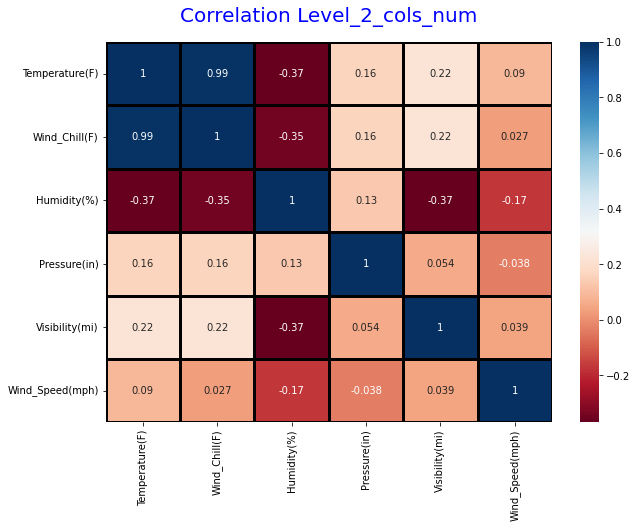

In [87]:
# and now, let's look at the correlation between numeric data type variables at Level_1

corelation_2 = level_2[level_2_cols_num]

plt.figure(figsize=(10, 7))
plt.title('Correlation Level_2_cols_num', fontsize=20, pad=20, c='b')
sn.heatmap(corelation_2.corr(), cmap='RdBu', linecolor='black', linewidth=3, annot=True)
plt.show()

**from the correlation graph you can see that dark blue means highly correlated and white has less correlation. The correlation here shows that for every increase in data on variable n, the variable m will also increase if it has a good correlation.**

In [28]:
level_2['City'].value_counts().head(5)

Miami          102955
Los Angeles     66220
Orlando         52313
Dallas          35739
Houston         32700
Name: City, dtype: int64

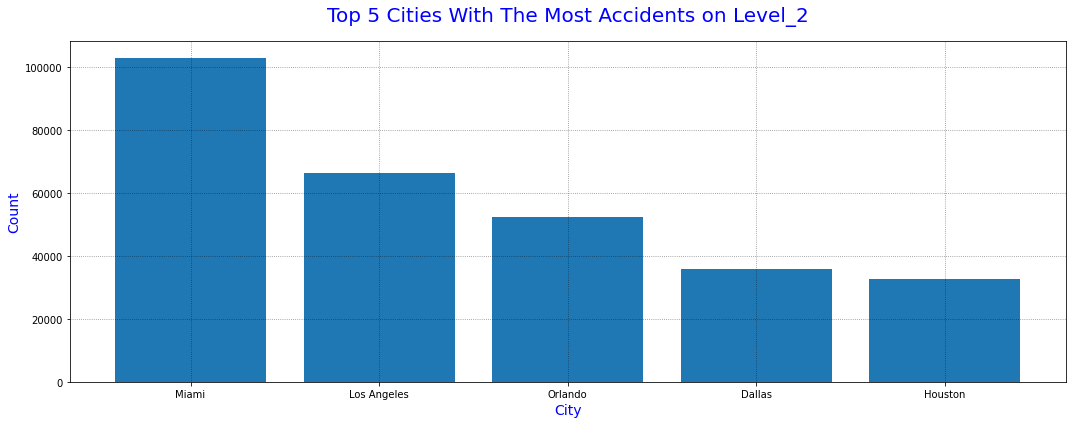

In [29]:
# Next I will show you the 5 cities with the most accidents on Level_1.

top_5_L2 = level_2['City'].value_counts().head(5).values
top_5_city_L2 = ['Miami', 'Los Angeles', 'Orlando', 'Dallas', 'Houston']

plt.figure(figsize=(15, 6))
plt.title('Top 5 Cities With The Most Accidents on Level_2', pad=20, c='b', fontsize=20)
plt.bar(top_5_city_L2, top_5_L2)
plt.xlabel('City', fontsize=14, c='b')
plt.ylabel('Count', fontsize=14, c='b')
plt.grid(c='black', alpha=0.5, linestyle=':')
plt.tight_layout()
plt.show()

In [30]:
# I will try to show the accident rate in the top 5 cities on Level_1 seen by the 'Visibility(mi)' factor.

cit_2 = level_2[['City', 'Visibility(mi)']].reset_index().drop('Severity', axis=1)
top_5_cities_L2 = []

for i in top_5_city_L2:
    Cities_2 = cit_2[cit_2['City'] == i]['Visibility(mi)'].dropna().values
    top_5_cities_L2.append(Cities)

In [31]:
for i in range(len(top_5_cities_L2)):
    No_2 = i + 1
    hum_ave_2 = sum(top_5_cities_L2[i])/len(top_5_cities_L2[i])
    print('%s. %s'%(No_2, top_5_city_L2[i]) + ' accident rate on Visibility(mi) :', hum_ave_2)

1. Miami accident rate on Visibility(mi) : 9.81656050955414
2. Los Angeles accident rate on Visibility(mi) : 9.81656050955414
3. Orlando accident rate on Visibility(mi) : 9.81656050955414
4. Dallas accident rate on Visibility(mi) : 9.81656050955414
5. Houston accident rate on Visibility(mi) : 9.81656050955414


**accidents in the 5 highest cities in Level_1 have an accident rate with Visibility(mi) 9.816 mi.**

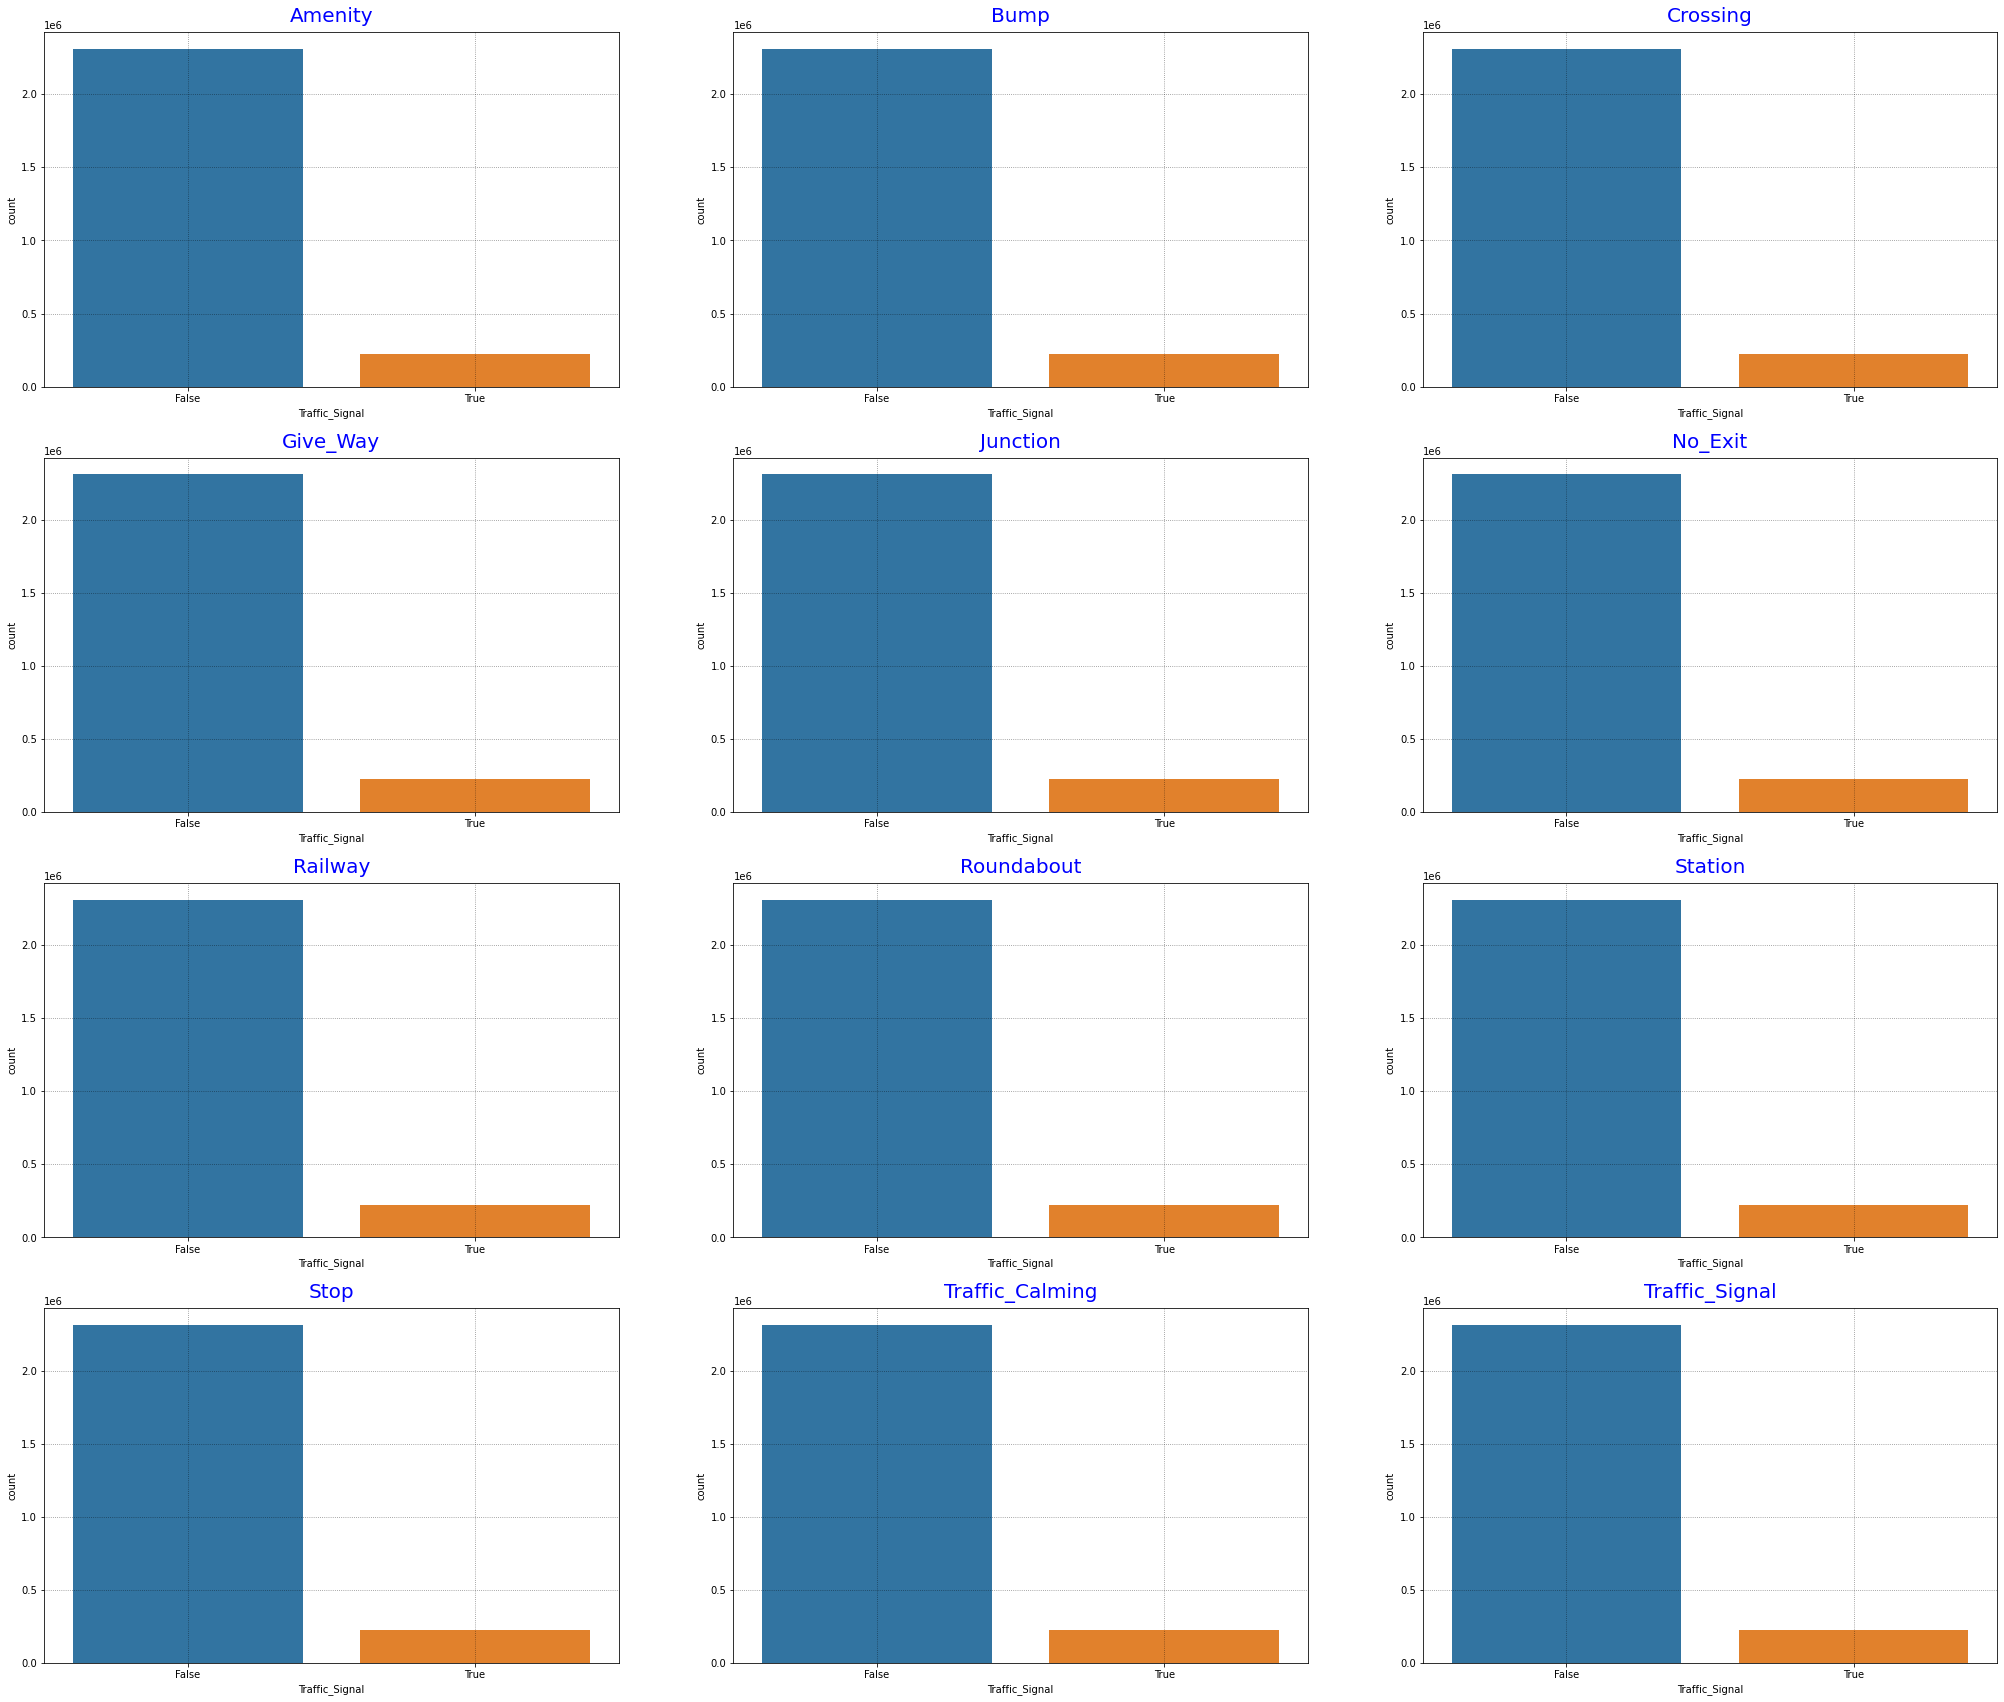

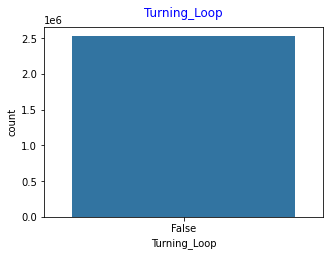

In [32]:
# Okay, for the next step on Level_1, I want to try to show the effect of signs on traffic on the many accidents that occur.

level_2_cols_bool = []

for i in level_2.columns:
    if level_2[i].dtypes == 'bool':
        level_2_cols_bool.append(i)

n_rows_c, n_cols_c = 4, 3
fig, axs = plt.subplots(n_rows_c, n_cols_c, figsize=(35, 30))     

I_c = -1
for r in range(0, n_rows_c):
    for c in range(0, n_cols_c):
        I_c += 1
        ax = axs[r][c]
        sn.countplot(level_2[level_2_cols_bool[I_n]], ax=ax)
        ax.grid(c='black', alpha=0.5, linestyle=':')
        ax.set_title(level_2_cols_bool[I_c], fontsize=20, pad=10, c='b')

plt.show()

plt.figure(figsize=(5, 3.5))
sn.countplot(level_2[level_2_cols_bool[-1]])
plt.title(level_2_cols_bool[-1], pad=10, c='b')
plt.show()

##### **3. Level 3**
level_3 level is the severity level more severe than level_1 & 2 data held.

In [33]:
# In this session, I will try to present important information from the data that we can analyze
level_3 = all_level[2]

print('1. Dimensions of the data :', level_3.shape)

print('\n2. Information about data :\n')
print(level_3.info())

print('\n3. Show null data on dataset : ', level_3.isna().sum().sum())
print(level_3.isna().sum())

level_3_cols_num = []
level_3_low = []
level_3_high = []

for i in level_3.columns:
    if level_3[i].dtypes == 'float64' or level_3[i].dtypes == 'int64':
        level_3_cols_num.append(i)
        
for i in level_3_cols_num:
    if level_3[i].std() < level_3[i].mean():
        level_3_low.append(i)
    elif level_3[i].std() > level_3[i].mean():
        level_3_high.append(i)
        
print('\n4. Columns data set is not very varied: ')
print(level_3_low)

print('\n5. Columns data set is to varied:')
print(level_3_high)

1. Dimensions of the data : (155105, 24)

2. Information about data :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155105 entries, 3 to 3
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     155105 non-null  object 
 1   City                   155101 non-null  object 
 2   County                 155105 non-null  object 
 3   Temperature(F)         151952 non-null  float64
 4   Wind_Chill(F)          81436 non-null   float64
 5   Astronomical_Twilight  155101 non-null  object 
 6   Humidity(%)            151722 non-null  float64
 7   Pressure(in)           152387 non-null  float64
 8   Visibility(mi)         151191 non-null  float64
 9   Wind_Speed(mph)        137387 non-null  float64
 10  Weather_Condition      151149 non-null  object 
 11  Amenity                155105 non-null  bool   
 12  Bump                   155105 non-null  bool   
 13  Crossing               

In [34]:
# Statistical information from the dataframe level_1
level_2.describe()

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,2.470921e+06,2.190631e+06,2.467553e+06,2.480111e+06,2.471000e+06,2.410262e+06
mean,6.186863e+01,6.001451e+01,6.436475e+01,2.946391e+01,9.079442e+00,7.264596e+00
std,1.852588e+01,2.086113e+01,2.279935e+01,1.025340e+00,2.616517e+00,5.528793e+00
min,-8.900000e+01,-8.900000e+01,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00
25%,5.000000e+01,4.700000e+01,4.800000e+01,2.930000e+01,1.000000e+01,3.000000e+00
50%,6.400000e+01,6.300000e+01,6.700000e+01,2.981000e+01,1.000000e+01,7.000000e+00
75%,7.600000e+01,7.600000e+01,8.300000e+01,3.000000e+01,1.000000e+01,1.000000e+01
max,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03


**Here are some important things to note before moving on to the next sesssion.**
1. From the dataset level_1, there are 155105 rows and 24 columns 
2. Some columns from the dataset, I will eliminate because the data is not really needed in this case.
3. From statistical information, some important things to note. On data classified as 'Columns data is not very varied', it can be said that the average of the data can be represented or described using the 'average' data for each accident. 
      1. Temperature(F) : 61.86863 F
      2. Wind Chill(F)  : 60.01451 F
      3. Humidity(%)    : 64.36475 %
      4. Pressure(in)   : 29.46391 in
      5. Visibility(mi) : 9.079442 mi
      6. Wind Speed(mph) : 7.264596 mph
4. There are 108519 blank data in the US accident dataset

In [35]:
# Next it will look for the percentile value of each column of data with a numeric value of dataframe dataframe level_1.

A_3 = []

for i in level_3_cols_num:
    A_3 += [percentile(level_3[i])]
    
percentil_data_3 = {
    'Temperature(F)' : A_3[0],
    'Wind_Chill(F)':A_3[1],
    'Humidity(%)':A_3[2],
    'Pressure(in)':A_3[3],
    'Visibility(mi)':A_3[4],
    'Wind_Speed(mph)':A_3[5]}

percentil_data_3 = pd.DataFrame(percentil_data_3)

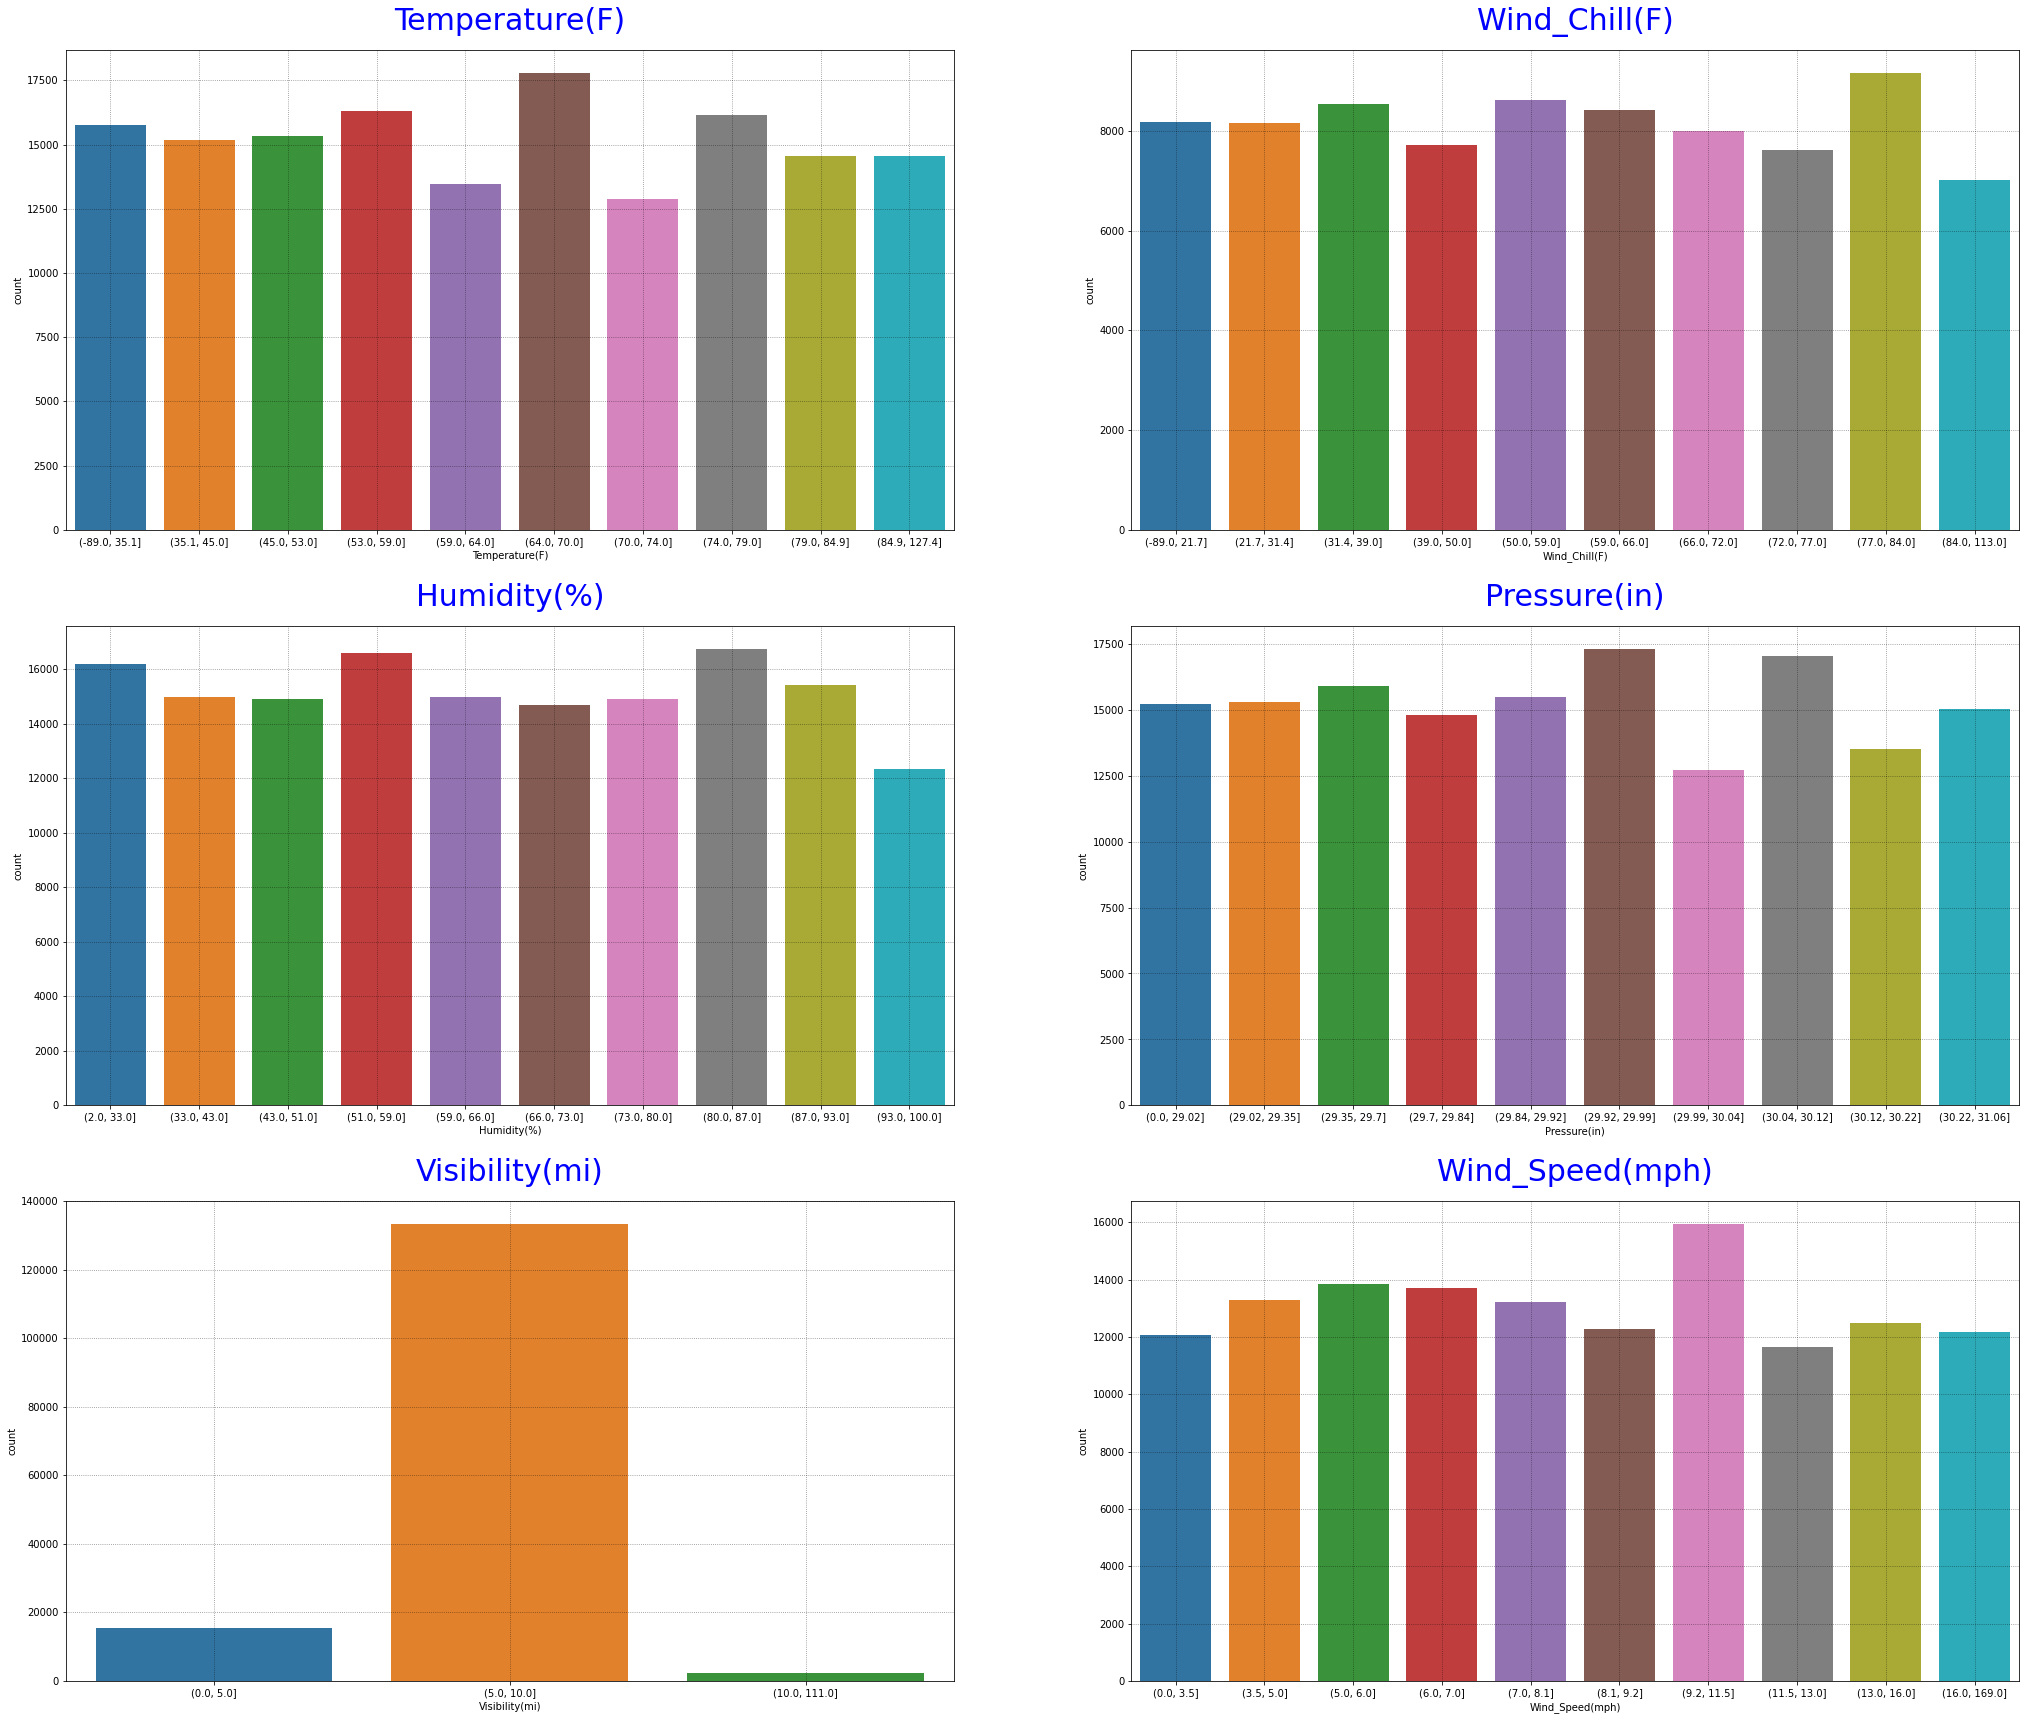

In [36]:
# I tried to display it using a plot bar to make it easy to see the difference in the number of accidents.

n_rows, n_cols = 3, 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(35, 30))

all_bins_3 = []
n_bins_3 = []    

for i in range(0, 6):
    n_bins_3 = pd.cut(level_3[level_3_cols_num[i]], percentil_data_3[level_3_cols_num[i]].drop_duplicates().values)
    all_bins_3.append(n_bins_3)
    
for i in percentil_data_3.columns:
    n_bins_3 = pd.cut(level_3[i], percentil_data_3[i].drop_duplicates().values)
    all_bins_3.append(n_bins_3)  

I_3 = -1
for r in range(0, n_rows):
    for c in range(0, n_cols):
        I_3 += 1
        ax = axs[r][c]
        sn.countplot(all_bins_3[I_3], ax=ax)
        ax.grid(c='black', alpha=0.5, linestyle=':')
        ax.set_title(level_3_cols_num[I_3], fontsize=30, pad=20, c='b')

plt.show()

1. First, let's take a look at the 'Temperature(F)' graph, the most accidents happen to brown bars at 64 F - 70 F.

2. In the graph 'Humidity(%)' most accidents occur on the blue bar with 'Humidity(%)' of 80% - 87% with the number of accidents of 155105 accidents.

3. If we look at the 'Pressure(in)' graph, the bars do not have a very large accident difference and it can be concluded that the effect of 'Pressure(in)' starting from the smallest pressure value of 30.5 in is not so influential on many accident case.

4. There are interesting things we can see in the graph 'Visibility(mi)'. In our basic logic, most accidents must occur at our visibility that is too short. However, data US Accident in Level_3 data doesn't speak like that, the most accident cases are at a visibility of 5 mi - 10 mi with a lot of accident cases of 133363 accidents and then the second highest with a shorter visibility that is 0 mi - 5 mi with many cases 15361 accidents then the smallest accident case was with a fairly far (good) visibility of 10 mi - 75 mi with the number of accident cases amounting to 2415.

    I assume that the number of accidents on the blue bar with 'Visibility(mi)' 0 mi - 5 mi is smaller than the orange bar with 'Visibility(mi)' 5 mi - 10 mi because the driver is more careful when driving due to the low visibility. quite short.
   
5. and lastly, we can see from the 'Wind_Speed(mph)' graph, the most accidents occur at wind speeds of 0 mph - 5 mph with the most accidents being 4381 accidents. Then the second most accident cases occurred at wind speeds of 10 mph - 13 mph with the number of accidents being 3012 accidents

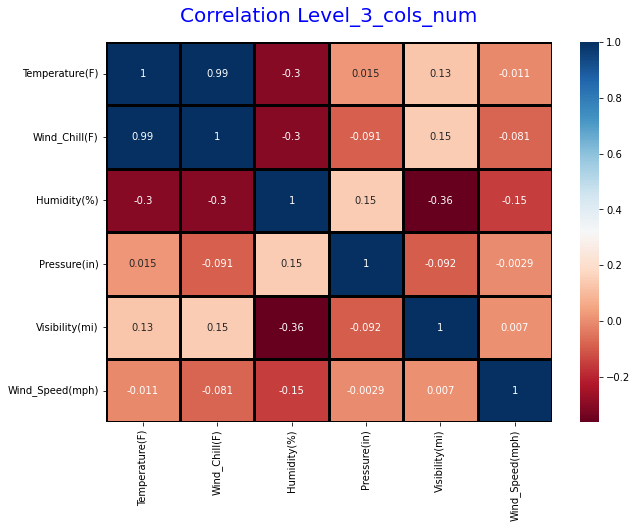

In [88]:
# and now, let's look at the correlation between numeric data type variables at Level_1

corelation_3 = level_3[level_3_cols_num]

plt.figure(figsize=(10, 7))
plt.title('Correlation Level_3_cols_num', fontsize=20, pad=20, c='b')
sn.heatmap(corelation_3.corr(), cmap='RdBu', linecolor='black', linewidth=3, annot=True)
plt.show()

**from the correlation graph you can see that dark blue means highly correlated and white has less correlation. The correlation here shows that for every increase in data on variable n, the variable m will also increase if it has a good correlation.**

In [38]:
level_3['City'].value_counts().head(5)

Chicago    6583
Houston    5923
Dallas     5379
Denver     3574
Atlanta    2900
Name: City, dtype: int64

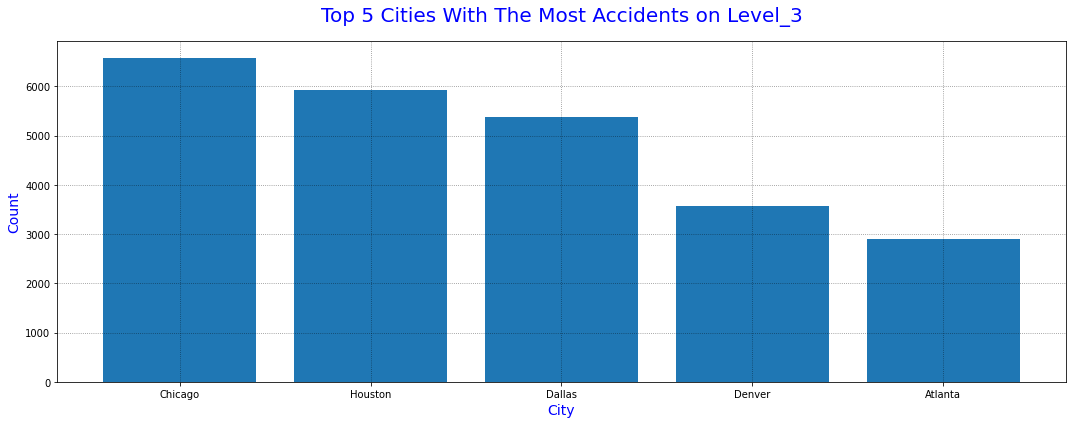

In [39]:
# Next I will show you the 5 cities with the most accidents on Level_1.

top_5_L3 = level_3['City'].value_counts().head(5).values
top_5_city_L3 = ['Chicago', 'Houston', 'Dallas', 'Denver', 'Atlanta']

plt.figure(figsize=(15, 6))
plt.title('Top 5 Cities With The Most Accidents on Level_3', pad=20, c='b', fontsize=20)
plt.bar(top_5_city_L3, top_5_L3)
plt.xlabel('City', fontsize=14, c='b')
plt.ylabel('Count', fontsize=14, c='b')
plt.grid(c='black', alpha=0.5, linestyle=':')
plt.tight_layout()
plt.show()

In [40]:
# I will try to show the accident rate in the top 5 cities on Level_1 seen by the 'Visibility(mi)' factor.

cit_3 = level_3[['City', 'Visibility(mi)']].reset_index().drop('Severity', axis=1)
top_5_cities_L3 = []

for i in top_5_city_L3:
    Cities_3 = cit_3[cit_3['City'] == i]['Visibility(mi)'].dropna().values
    top_5_cities_L3.append(Cities)

In [41]:
for i in range(len(top_5_cities_L3)):
    No_3 = i + 1
    hum_ave_3 = sum(top_5_cities_L3[i])/len(top_5_cities_L3[i])
    print('%s. %s'%(No_3, top_5_city_L3[i]) + ' accident rate on Visibility(mi) :', hum_ave_3)

1. Chicago accident rate on Visibility(mi) : 9.81656050955414
2. Houston accident rate on Visibility(mi) : 9.81656050955414
3. Dallas accident rate on Visibility(mi) : 9.81656050955414
4. Denver accident rate on Visibility(mi) : 9.81656050955414
5. Atlanta accident rate on Visibility(mi) : 9.81656050955414


**accidents in the 5 highest cities in Level_1 have an accident rate with Visibility(mi) 9.816 mi.**

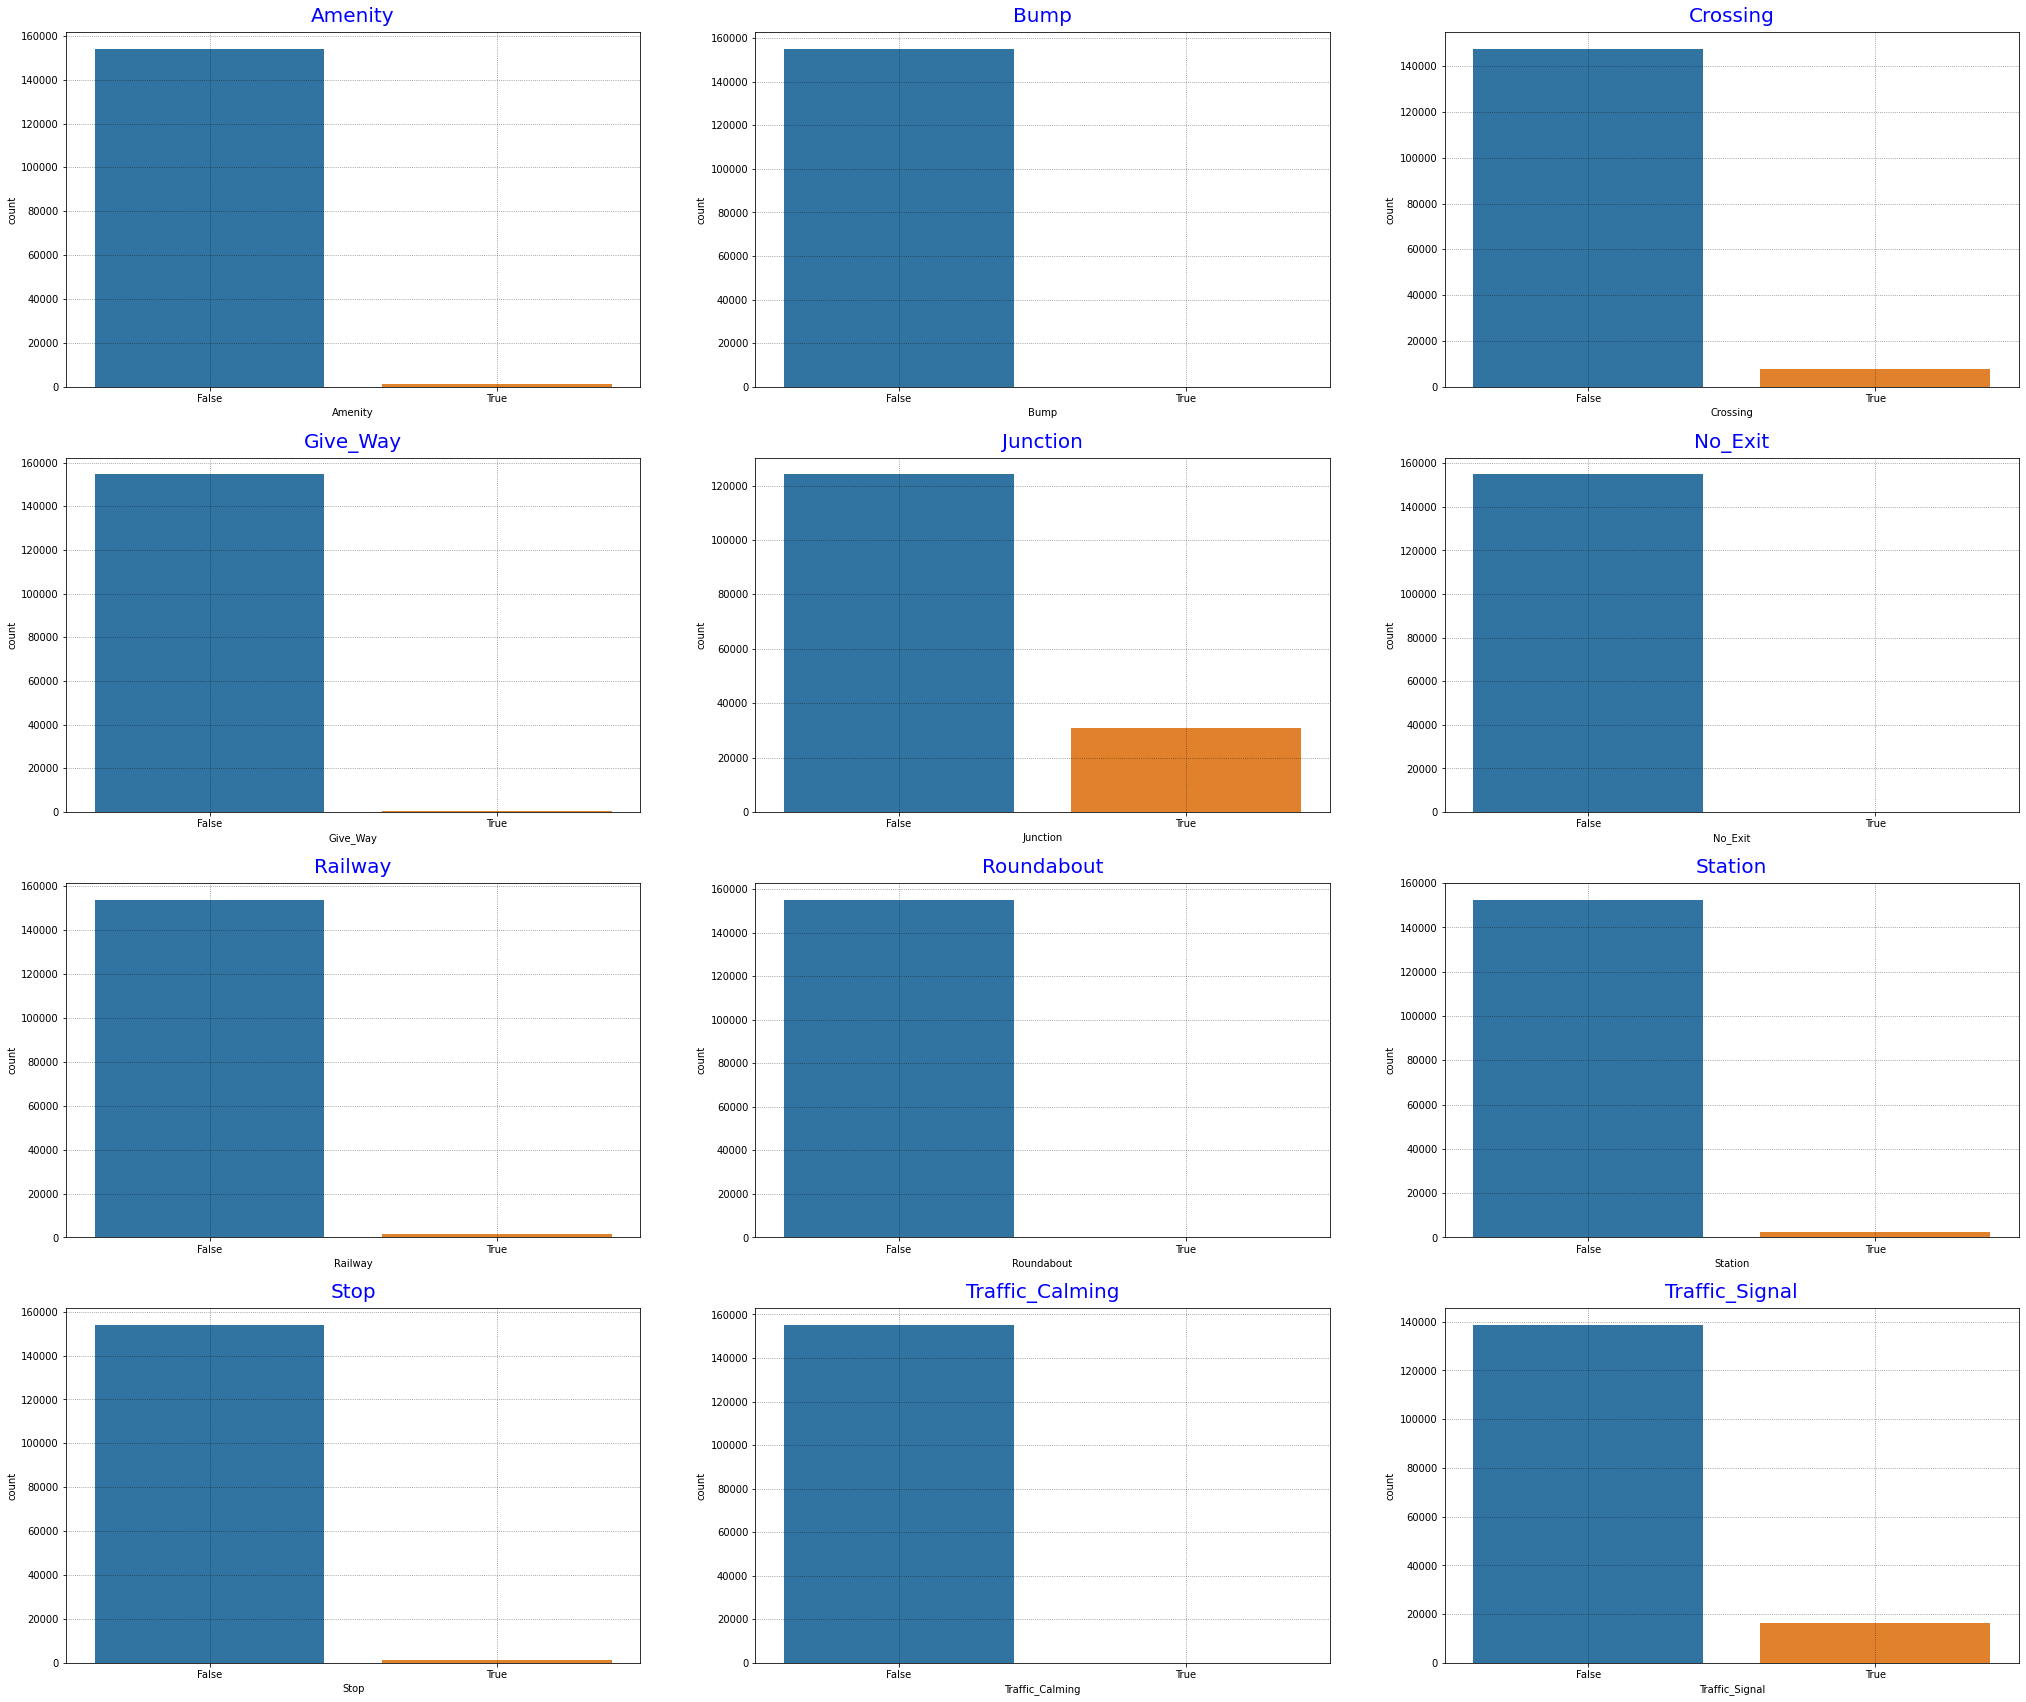

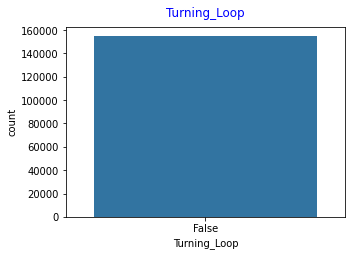

In [42]:
# Okay, for the next step on Level_1, I want to try to show the effect of signs on traffic on the many accidents that occur.

level_3_cols_bool = []

for i in level_3.columns:
    if level_3[i].dtypes == 'bool':
        level_3_cols_bool.append(i)

n_rows_d, n_cols_d = 4, 3
fig, axs = plt.subplots(n_rows_c, n_cols_c, figsize=(35, 30))     

I_d = -1
for r in range(0, n_rows_d):
    for c in range(0, n_cols_d):
        I_d += 1
        ax = axs[r][c]
        sn.countplot(level_3[level_3_cols_bool[I_d]], ax=ax)
        ax.grid(c='black', alpha=0.5, linestyle=':')
        ax.set_title(level_3_cols_bool[I_d], fontsize=20, pad=10, c='b')

plt.show()

plt.figure(figsize=(5, 3.5))
sn.countplot(level_3[level_3_cols_bool[-1]])
plt.title(level_3_cols_bool[-1], pad=10, c='b')
plt.show()

##### **4. Level 4**
Level 4 is the highest level of severity in the US Accident data.

In [43]:
# In this session, I will try to present important information from the data that we can analyze
level_4 = all_level[3]

print('1. Dimensions of the data :', level_4.shape)

print('\n2. Information about data :\n')
print(level_4.info())

print('\n3. Show null data on dataset : ', level_4.isna().sum().sum())
print(level_4.isna().sum())

level_4_cols_num = []
level_4_low = []
level_4_high = []

for i in level_4.columns:
    if level_4[i].dtypes == 'float64' or level_4[i].dtypes == 'int64':
        level_4_cols_num.append(i)
        
for i in level_4_cols_num:
    if level_4[i].std() < level_4[i].mean():
        level_4_low.append(i)
    elif level_4[i].std() > level_4[i].mean():
        level_4_high.append(i)
        
print('\n4. Columns data set is not very varied: ')
print(level_4_low)

print('\n5. Columns data set is to varied:')
print(level_4_high)

1. Dimensions of the data : (131193, 24)

2. Information about data :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131193 entries, 4 to 4
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     131193 non-null  object 
 1   City                   131174 non-null  object 
 2   County                 131193 non-null  object 
 3   Temperature(F)         127458 non-null  float64
 4   Wind_Chill(F)          78060 non-null   float64
 5   Astronomical_Twilight  130705 non-null  object 
 6   Humidity(%)            127256 non-null  float64
 7   Pressure(in)           127879 non-null  float64
 8   Visibility(mi)         126865 non-null  float64
 9   Wind_Speed(mph)        114150 non-null  float64
 10  Weather_Condition      126784 non-null  object 
 11  Amenity                131193 non-null  bool   
 12  Bump                   131193 non-null  bool   
 13  Crossing               

In [44]:
# Statistical information from the dataframe level_1
level_4.describe()

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,127458.000000,78060.000000,127256.000000,127879.000000,126865.000000,114150.000000
mean,58.275355,51.276253,67.544336,29.602213,9.095082,8.003333
std,19.476375,23.655259,22.507904,1.102249,3.000708,5.592114
min,-40.000000,-65.900000,2.000000,19.740000,0.000000,0.000000
25%,44.100000,32.800000,51.000000,29.530000,10.000000,4.600000
50%,60.100000,54.000000,70.000000,29.920000,10.000000,7.000000
75%,73.400000,71.000000,87.000000,30.090000,10.000000,10.400000
max,117.000000,116.000000,100.000000,31.120000,120.000000,471.800000


**Here are some important things to note before moving on to the next sesssion.**
1. From the dataset level_1, there are 131193 rows and 24 columns 
2. Some columns from the dataset, I will eliminate because the data is not really needed in this case.
3. From statistical information, some important things to note. On data classified as 'Columns data is not very varied', it can be said that the average of the data can be represented or described using the 'average' data for each accident. 
      1. Temperature(F) : 61.86863 F
      2. Wind Chill(F)  : 60.01451 F
      3. Humidity(%)    : 64.36475 %
      4. Pressure(in)   : 29.46391 in
      5. Visibility(mi) : 9.079442 mi
      6. Wind Speed(mph) : 7.264596 mph
4. There are 90406 blank data in the US accident dataset

In [45]:
# Next it will look for the percentile value of each column of data with a numeric value of dataframe dataframe level_1.

A_4 = []

for i in level_4_cols_num:
    A_4 += [percentile(level_4[i])]
    
percentil_data_4 = {
    'Temperature(F)' : A_4[0],
    'Wind_Chill(F)':A_4[1],
    'Humidity(%)':A_4[2],
    'Pressure(in)':A_4[3],
    'Visibility(mi)':A_4[4],
    'Wind_Speed(mph)':A_4[5]}

percentil_data_4 = pd.DataFrame(percentil_data_4)

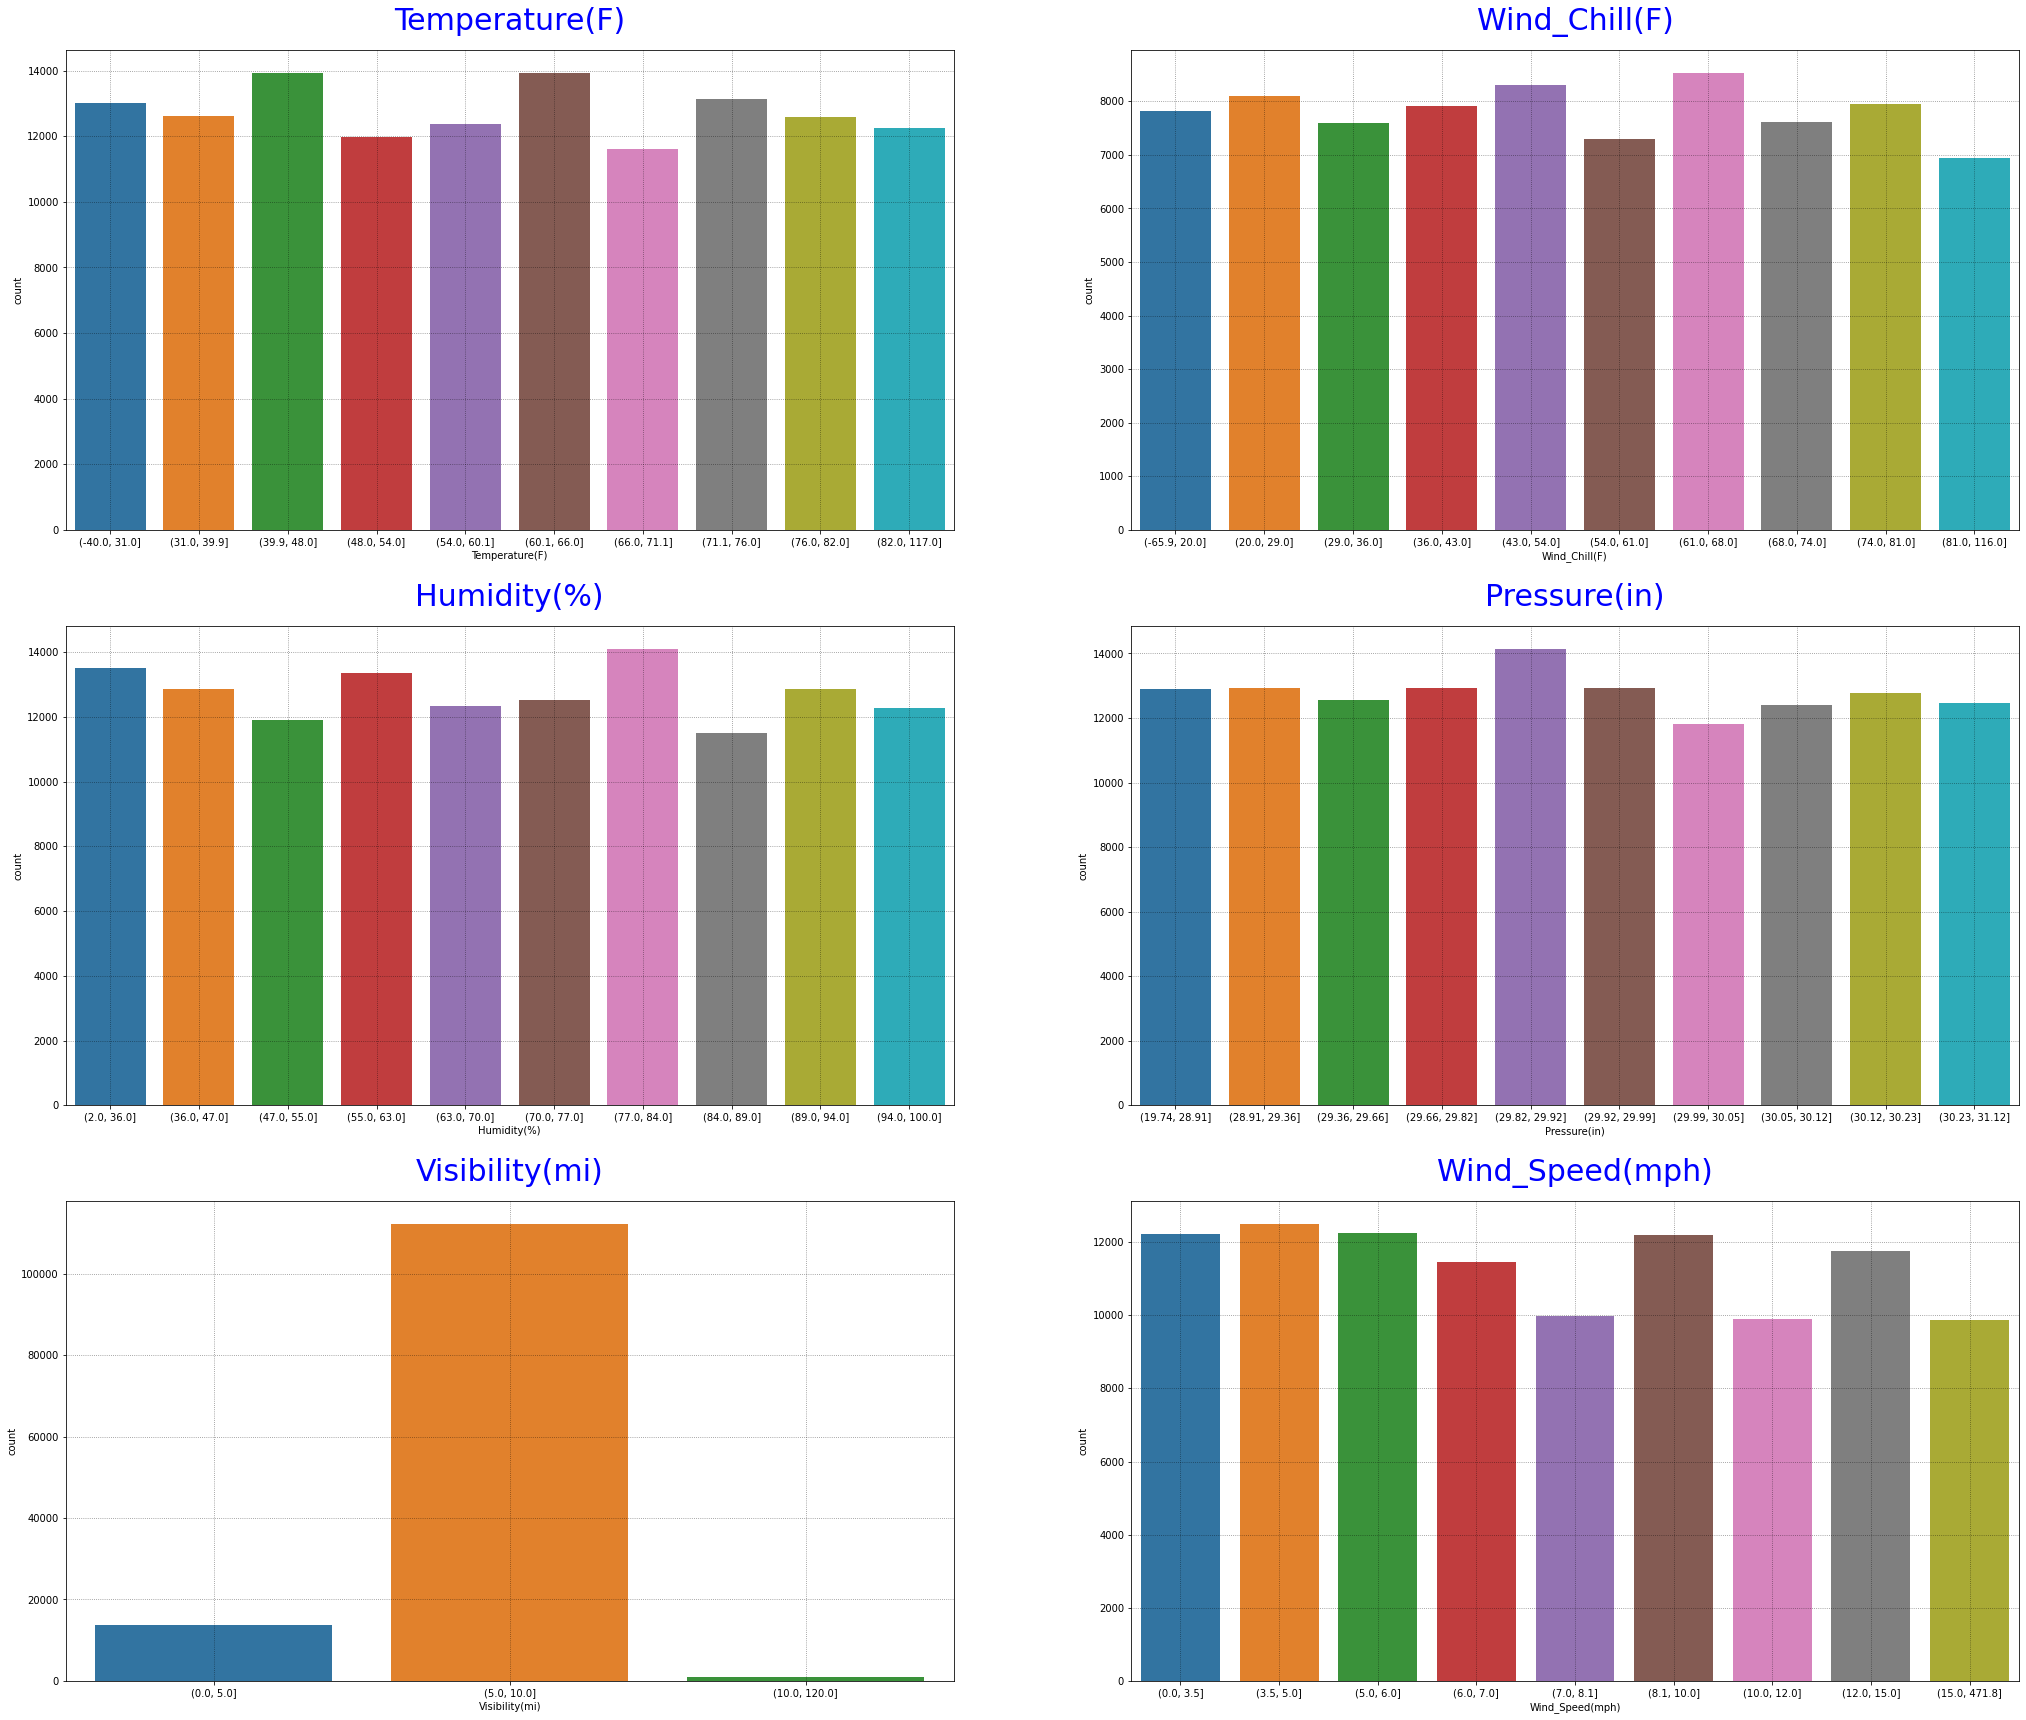

In [46]:
# I tried to display it using a plot bar to make it easy to see the difference in the number of accidents.

n_rows, n_cols = 3, 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(35, 30))

all_bins_4 = []
n_bins_4 = []    

for i in range(0, 6):
    n_bins_4 = pd.cut(level_4[level_4_cols_num[i]], percentil_data_4[level_4_cols_num[i]].drop_duplicates().values)
    all_bins_4.append(n_bins_4)
    
for i in percentil_data_4.columns:
    n_bins_4 = pd.cut(level_4[i], percentil_data_4[i].drop_duplicates().values)
    all_bins_4.append(n_bins_4)  

I_4 = -1
for r in range(0, n_rows):
    for c in range(0, n_cols):
        I_4 += 1
        ax = axs[r][c]
        sn.countplot(all_bins_4[I_4], ax=ax)
        ax.grid(c='black', alpha=0.5, linestyle=':')
        ax.set_title(level_4_cols_num[I_4], fontsize=30, pad=20, c='b')

plt.show()

1. First, let's take a look at the 'Temperature(F)' graph, the most accidents happen to brown bars at 60.1 F - 66.0 F with many accident cases of 13933.

2. In the graph 'Humidity(%)' most accidents occur on the pink bar with 'Humidity(%)' of 77% - 84% with the number of accidents of 14112 accidents.

3. In the graph 'Pressure(in)' most accidents occur on the purple bar with 29.82 in - 29.92 in with the number of accidents of 14152 accidents.

4. There are interesting things we can see in the graph 'Visibility(mi)'. In our basic logic, most accidents must occur at our visibility that is too short. However, data US Accident in Level_4 data doesn't speak like that, the most accident cases are at a visibility of 5 mi - 10 mi with a lot of accident cases of 112209 accidents and then the second highest with a shorter visibility that is 0 mi - 5 mi with many cases 13694 accidents then the smallest accident case was with a fairly far (good) visibility of 10 mi - 75 mi with the number of accident cases amounting to 849.

    I assume that the number of accidents on the blue bar with 'Visibility(mi)' 0 mi - 5 mi is smaller than the orange bar with 'Visibility(mi)' 5 mi - 10 mi because the driver is more careful when driving due to the low visibility. quite short.
   
5. and lastly, we can see from the 'Wind_Speed(mph)' graph, the most accidents occur at wind speeds of 3.5 mph - 5 mph with the most accidents being 12493 accidents. Then the second most accident cases occurred at wind speeds of 5 mph - 6 mph with the number of accidents being 12241 accidents

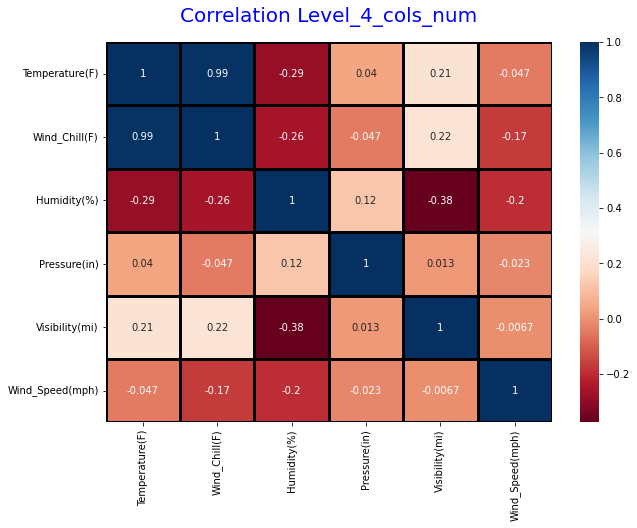

In [89]:
# and now, let's look at the correlation between numeric data type variables at Level_1

corelation_4 = level_4[level_4_cols_num]

plt.figure(figsize=(10, 7))
plt.title('Correlation Level_4_cols_num', fontsize=20, pad=20, c='b')
sn.heatmap(corelation_4.corr(), cmap='RdBu', linecolor='black', linewidth=3, annot=True)
plt.show()

**from the correlation graph you can see that dark blue means highly correlated and white has less correlation. The correlation here shows that for every increase in data on variable n, the variable m will also increase if it has a good correlation.**

In [48]:
level_4['City'].value_counts().head(5)

Miami         1580
Atlanta       1467
Orlando        927
Dallas         858
Washington     835
Name: City, dtype: int64

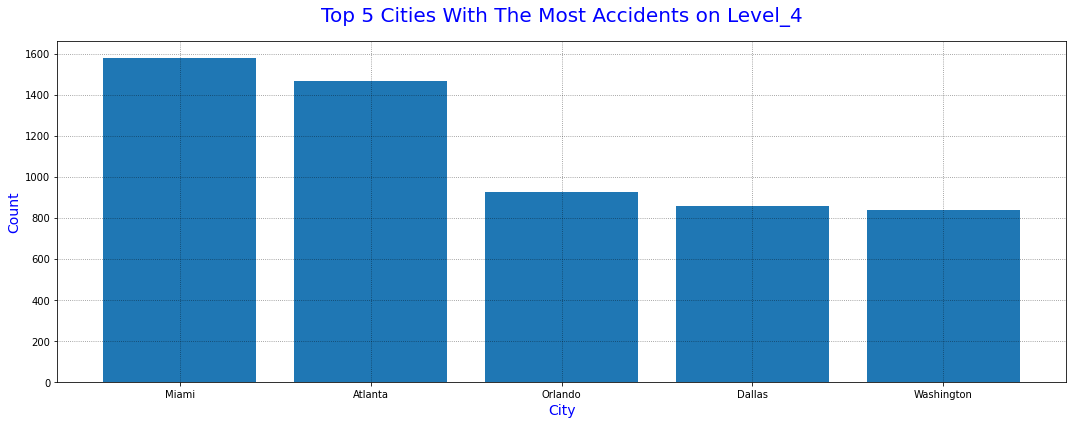

In [49]:
# Next I will show you the 5 cities with the most accidents on Level_1.

top_5_L4 = level_4['City'].value_counts().head(5).values
top_5_city_L4 = ['Miami', 'Atlanta', 'Orlando', 'Dallas', 'Washington']

plt.figure(figsize=(15, 6))
plt.title('Top 5 Cities With The Most Accidents on Level_4', pad=20, c='b', fontsize=20)
plt.bar(top_5_city_L4, top_5_L4)
plt.xlabel('City', fontsize=14, c='b')
plt.ylabel('Count', fontsize=14, c='b')
plt.grid(c='black', alpha=0.5, linestyle=':')
plt.tight_layout()
plt.show()

In [50]:
# I will try to show the accident rate in the top 5 cities on Level_1 seen by the 'Visibility(mi)' factor.

cit_4 = level_4[['City', 'Visibility(mi)']].reset_index().drop('Severity', axis=1)
top_5_cities_L4 = []

for i in top_5_city_L4:
    Cities_4 = cit_4[cit_4['City'] == i]['Visibility(mi)'].dropna().values
    top_5_cities_L4.append(Cities)

In [51]:
for i in range(len(top_5_cities_L3)):
    No_3 = i + 1
    hum_ave_3 = sum(top_5_cities_L3[i])/len(top_5_cities_L3[i])
    print('%s. %s'%(No_3, top_5_city_L3[i]) + ' accident rate on Visibility(mi) :', hum_ave_3)

1. Chicago accident rate on Visibility(mi) : 9.81656050955414
2. Houston accident rate on Visibility(mi) : 9.81656050955414
3. Dallas accident rate on Visibility(mi) : 9.81656050955414
4. Denver accident rate on Visibility(mi) : 9.81656050955414
5. Atlanta accident rate on Visibility(mi) : 9.81656050955414


**accidents in the 5 highest cities in Level_4 have an accident rate with Visibility(mi) 9.816 mi.**

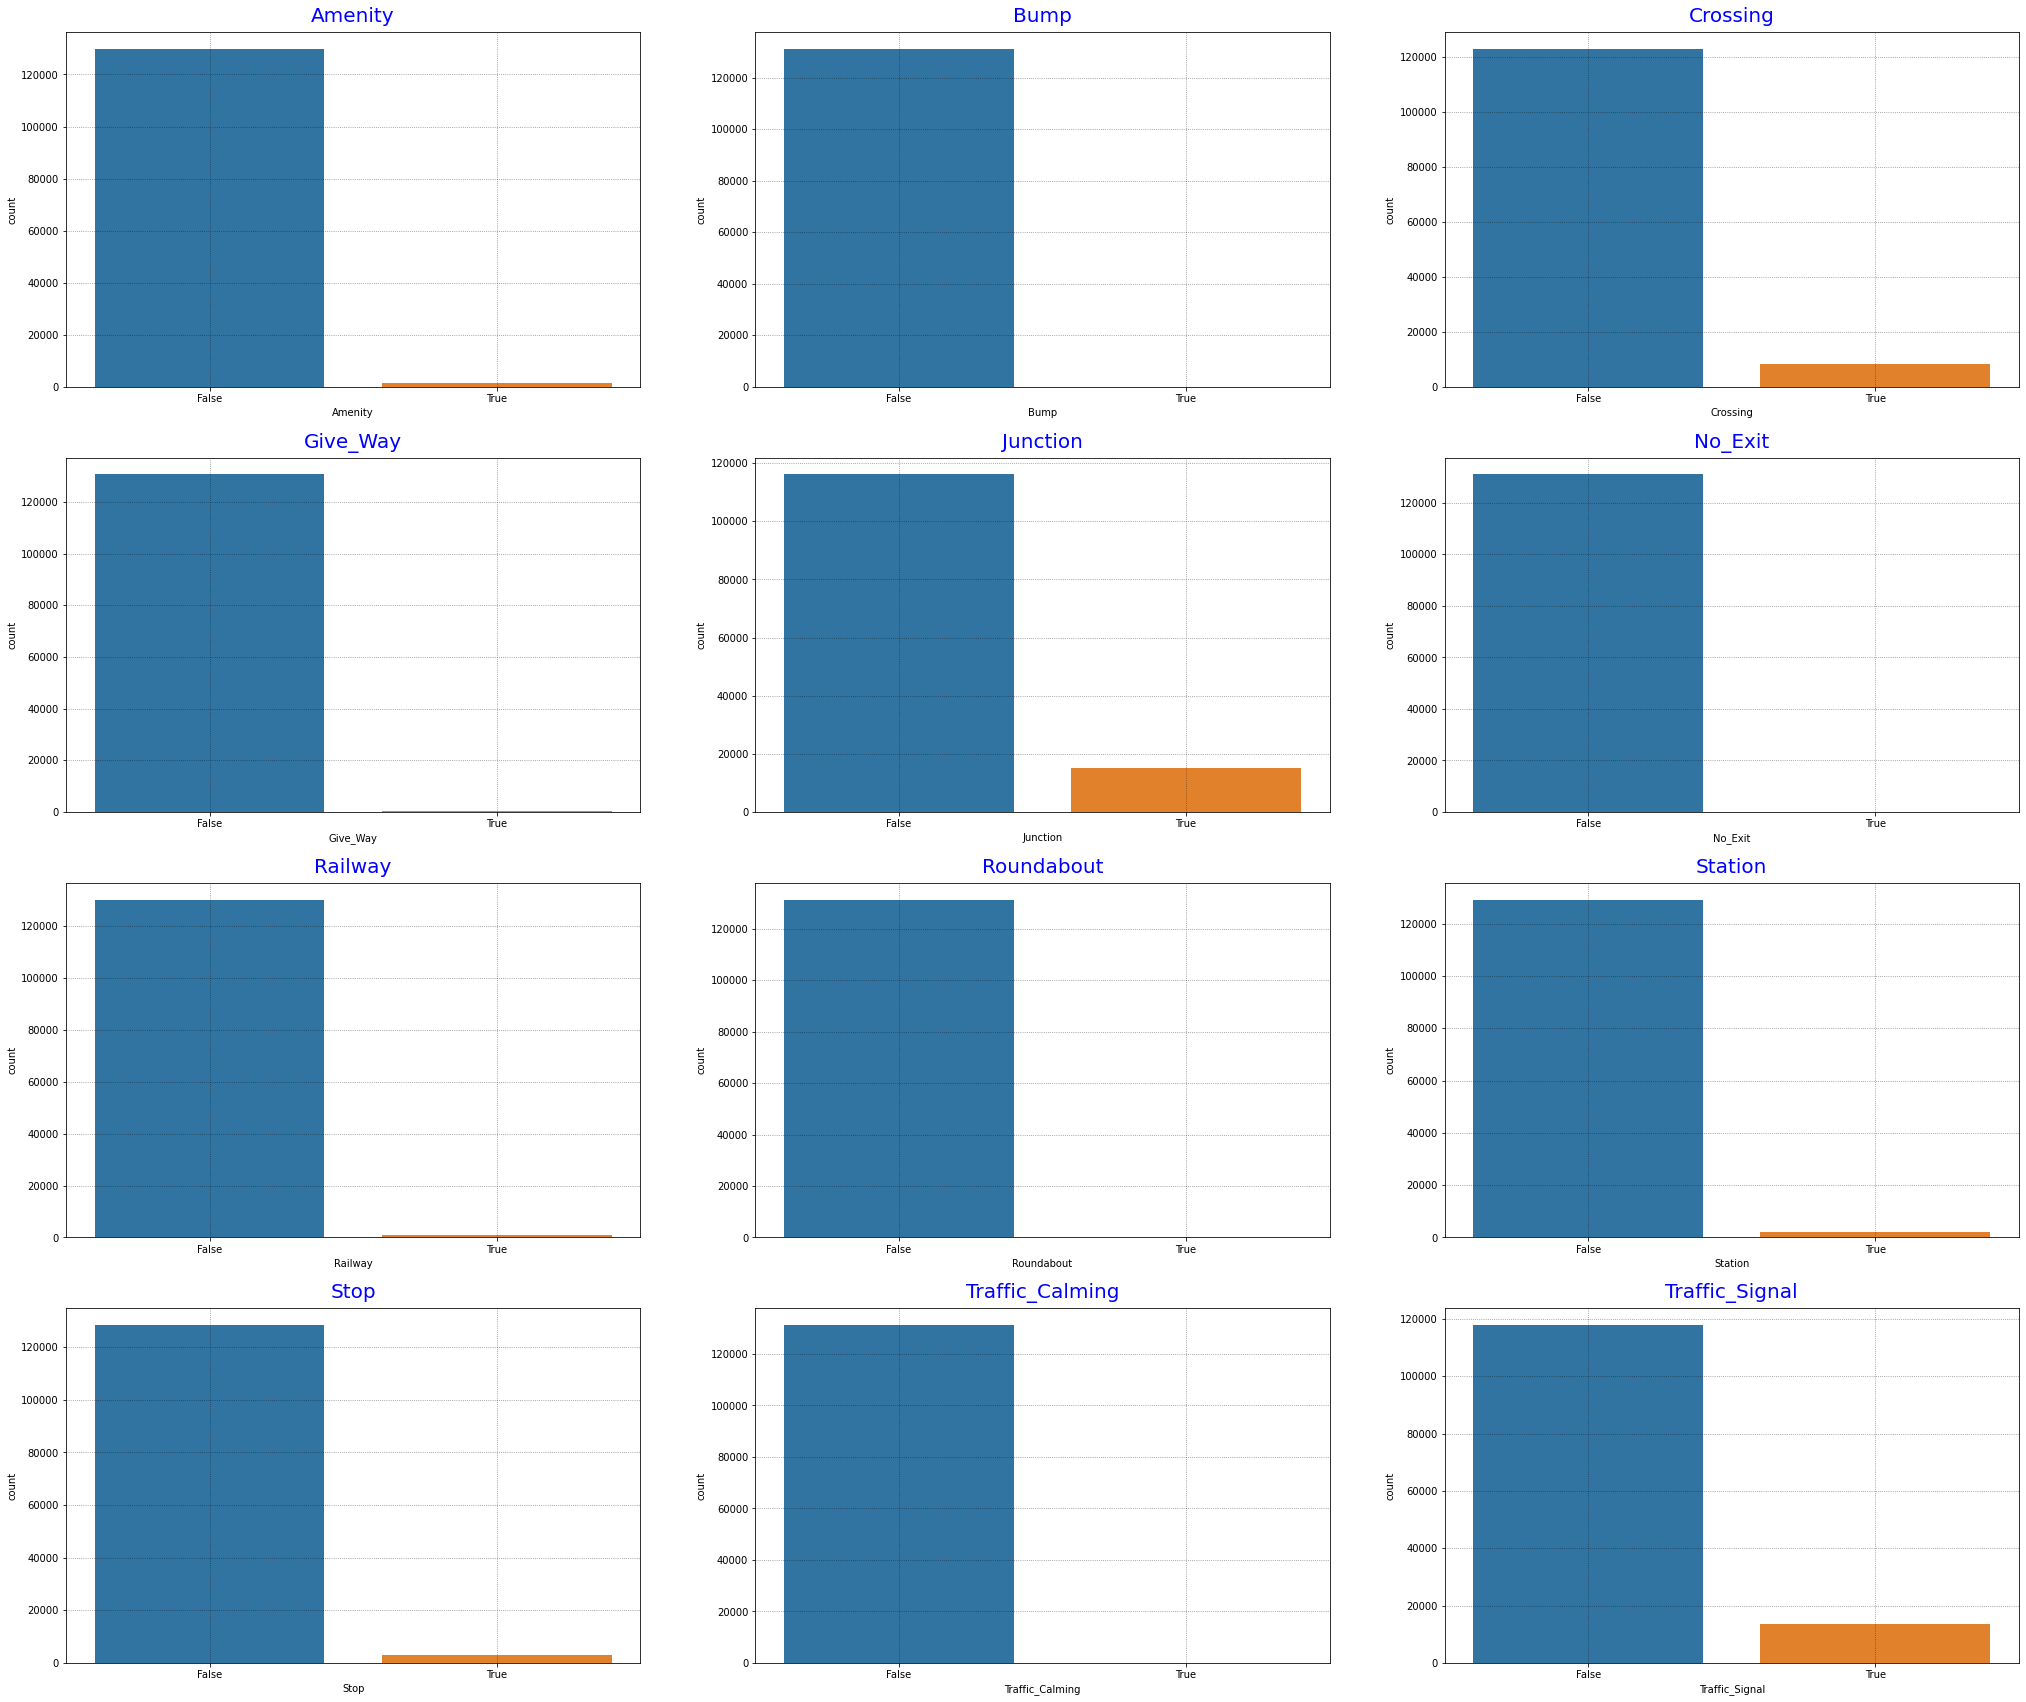

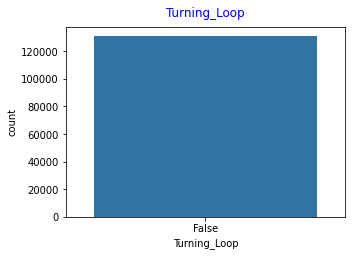

In [52]:
# Okay, for the next step on Level_1, I want to try to show the effect of signs on traffic on the many accidents that occur.

level_4_cols_bool = []

for i in level_4.columns:
    if level_4[i].dtypes == 'bool':
        level_4_cols_bool.append(i)

n_rows_e, n_cols_e = 4, 3
fig, axs = plt.subplots(n_rows_e, n_cols_e, figsize=(35, 30))     

I_e = -1
for r in range(0, n_rows_e):
    for c in range(0, n_cols_e):
        I_e += 1
        ax = axs[r][c]
        sn.countplot(level_4[level_4_cols_bool[I_e]], ax=ax)
        ax.grid(c='black', alpha=0.5, linestyle=':')
        ax.set_title(level_4_cols_bool[I_e], fontsize=20, pad=10, c='b')

plt.show()

plt.figure(figsize=(5, 3.5))
sn.countplot(level_4[level_4_cols_bool[-1]])
plt.title(level_4_cols_bool[-1], pad=10, c='b')
plt.show()

#### **4. Fix any missing or incorrect values**

1. Delete unnecessary column data
2. Fix missing values

##### **1. Delete unnecessary column data**
From the US Accidents dataset that we have, we will sort and retrieve the data that is needed for the next hold, namely Machine Learning.

In [53]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Duration(Hours)'] = abs((df['End_Time'].dt.hour%12) - (df['Start_Time'].dt.hour%12))

important_columns = ['ID','Severity','Duration(Hours)','City','Astronomical_Twilight'] + level_1_cols_num + level_1_cols_bool

ds = df[important_columns]
ds.head()

,ID,Severity,Duration(Hours),City,Astronomical_Twilight,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-1,3,6,Dublin,Night,42.1,36.1,58.0,29.76,10.0,...,False,False,False,False,False,False,False,False,False,False
1,A-2,2,6,Dayton,Night,36.9,NaN,91.0,29.68,10.0,...,False,False,False,False,False,False,False,False,False,False
2,A-3,2,6,Cincinnati,Day,36.0,NaN,97.0,29.70,10.0,...,False,True,False,False,False,False,False,False,False,False
3,A-4,2,6,Akron,Day,39.0,NaN,55.0,29.65,10.0,...,False,False,False,False,False,False,False,False,False,False
4,A-5,3,6,Cincinnati,Day,37.0,29.8,93.0,29.69,10.0,...,False,False,False,False,False,False,False,False,False,False


**After Delete unnecessary data, we do not use as many as 22 columns of data from the UC Accidents dataset.**

##### **2. Fix missing values**
then in the second stage, empty data will be cleaned.

In [54]:
null_columns = []

def check_null(data):
    print('The following is null data and how many percent of null data are contained in the dataset owned.\n')
    for i in range(0, len(data.columns)):
        no = i -2
        if data[data.columns[i]].isna().any() == True:
            null_columns.append(data.columns[i])
            percent_null_data = (data[data.columns[i]].isna().sum()/len(data[data.columns[i]]))*100
            print('%i. %s'%(no, data.columns[i]))
            print('   Lots of data : %i'%(len(data[data.columns[i]])))
            print('   Lots of null data : %i'%(data[data.columns[i]].isna().sum()))
            print('   What percent of data is missing : %f%%'%(percent_null_data))
            print('\n')
    return print('The greater the percentage of data that is deleted or filled in with the data cleaning method, the more likely it is to cause a decrease in machine learning performance later.')

def fix_null_num(data_num):
    for i in range(0, len(level_1_cols_num)):
        A_mean = ds[level_1_cols_num[i]].mean()
        A_std = ds[level_1_cols_num[i]].std()
        if A_std < A_mean:
            ds[level_1_cols_num[i]] = ds[level_1_cols_num[i]].fillna(A_mean)
            
check_null(ds)

The following is null data and how many percent of null data are contained in the dataset owned.

1. City
   Lots of data : 2845342
   Lots of null data : 137
   What percent of data is missing : 0.004815%


2. Astronomical_Twilight
   Lots of data : 2845342
   Lots of null data : 2867
   What percent of data is missing : 0.100761%


3. Temperature(F)
   Lots of data : 2845342
   Lots of null data : 69274
   What percent of data is missing : 2.434646%


4. Wind_Chill(F)
   Lots of data : 2845342
   Lots of null data : 469643
   What percent of data is missing : 16.505678%


5. Humidity(%)
   Lots of data : 2845342
   Lots of null data : 73092
   What percent of data is missing : 2.568830%


6. Pressure(in)
   Lots of data : 2845342
   Lots of null data : 59200
   What percent of data is missing : 2.080593%


7. Visibility(mi)
   Lots of data : 2845342
   Lots of null data : 70546
   What percent of data is missing : 2.479350%


8. Wind_Speed(mph)
   Lots of data : 2845342
   Lots of nu

**After seeing null data using the built function, the following decision will be made.**

1. Wind_Chill(F), Because it has quite a lot of null data and has a strong correlation with the "Temperature(F)" column, simply knowing "Temperature(F)" can be sure the value of "Wind_Child(F)" will also be the same.

2. In Columns 'City' and 'Astronomical_Twilight' the empty row data will be deleted, this can be done because the percentage of empty data in Columns 'City' is 0.004815% and 'Astronomical_Twilight' is 0.100761%.

3. In this session, I tried to fill in the null num data with mean if the std are less then mean data.

In [55]:
# 1. Drop Wind_Chill(F)
ds = ds.drop('Wind_Chill(F)', axis=1)

In [56]:
# 2. Fillna null rows from column 'City'
ds['City'] = ds['City'].fillna('Unknown')
ds['Astronomical_Twilight'] = ds['Astronomical_Twilight'].fillna('Unknown')

In [57]:
# 3. Fix null data num from function what have made.
cols_num = level_1_cols_num.remove('Wind_Chill(F)')
fix_null_num(cols_num)

### **2. Preprocessing Data**
In the preprocessing session, we will convert non-numeric types into numeric types with the LabelEncoder of sklearn.preprocessing and also prepare other things needed for Machine Learning.

In [58]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [59]:
columns_non_numeric = []

for i in ds.columns:
    if ds[i].dtypes != 'int64' and ds[i].dtypes != 'float64':
        columns_non_numeric.append(i)
        
for i in columns_non_numeric:
    ds[i] = LE.fit_transform(ds[i])

ds.drop('ID',axis=1,inplace=True)

In [60]:
ds.head()

,Severity,Duration(Hours),City,Astronomical_Twilight,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,3,6,2822,1,42.1,58.0,29.76,10.0,10.400000,0,...,0,0,0,0,0,0,0,0,0,0
1,2,6,2534,1,36.9,91.0,29.68,10.0,7.395044,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,1904,0,36.0,97.0,29.70,10.0,7.395044,0,...,0,1,0,0,0,0,0,0,0,0
3,2,6,70,0,39.0,55.0,29.65,10.0,7.395044,0,...,0,0,0,0,0,0,0,0,0,0
4,3,6,1904,0,37.0,93.0,29.69,10.0,10.400000,0,...,0,0,0,0,0,0,0,0,0,0


### **3. Supervised Learning**

In [61]:
X = ds.drop(['Severity'], axis=1)
y = ds[['Severity']]

**To make it easier to analyze the final accuracy score of the prediction results, I did a grouping for 'Severity' level-1 & 2 is 0, and for 'Severity' level-3 & 4 is 1.**

In [62]:
for i in range(1, 5):
    if i < 3:
        y[y['Severity'] == i] = 0
    else:
        y[y['Severity'] == i] = 1

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [64]:
columns_scaling = ['City','Duration(Hours)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']

X[columns_scaling] = scaler.fit_transform(X[columns_scaling])

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

Training Accuracy : 0.9935956715209467
Testing Accuracy : 0.8785120960727082


In [75]:
cm = confusion_matrix(y_test,y_pred, labels=[0,1])
print('Confusion Matrix :\n',cm)

Confusion Matrix :
 [[476038  35897]
 [ 33238  23896]]


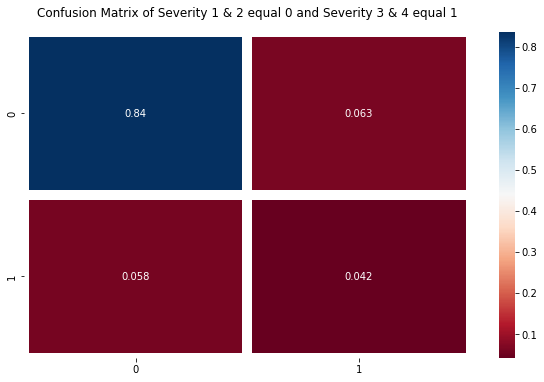

In [81]:
cm_new = np.zeros((2,2))

for i in range(len(cm)):
    for k in range(len(cm)):
        cm_new[i][k] = cm[i][k]/len(y_pred)

plt.figure(figsize=(10, 6))
plt.title('Confusion Matrix of Severity 1 & 2 equal 0 and Severity 3 & 4 equal 1', c='black', pad=15,fontsize=12)
plt.xlabel('PREDICTED', c='g', fontsize=15)
sn.heatmap(cm_new, cmap='RdBu', linecolor='white', linewidth=10, annot=True)
plt.show()

In [84]:
cm[1][1]/len(y_pred)

0.04199139295937751

In [71]:
print('Classificario Report:\n', classification_report(y_test, y_pred, labels=[0,1]))

Classificario Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93    511935
           1       0.40      0.42      0.41     57134

    accuracy                           0.88    569069
   macro avg       0.67      0.67      0.67    569069
weighted avg       0.88      0.88      0.88    569069



**it can be seen from the confusion_matrix that the guessing program True 0 has a fairly high percentage of 84% or 476038. Then the guessing program False 1 and False 0 has a fairly low percentage of 0.63% and 0.58% then the guess program True 1 has a very low value that is equal to 0.42%.**

**As a result of unbalanced values, it is not so accurate when taking the accuracy value using a score. The best thing for me is to take the F1 Score as the program accuracy value with a value of**

- 0  -->  0.93
- 1  -->  0.41

**As we know F1 Score is a True Positive or True Negative value divided by False Positive and False Negative. gives an illustration that if the False Positive and False Negative values are large, the F1 Score value will also decrease. Or simply F1 Score is a combination of Precision and Recall.**